# Smart Home Automation

**Team Number:** 1

**Team Members:**

*   Anirudh Jayan
*   Abhinav Variyath
*   Tara Samiksha
*   Sarvesh Ram Kumar
*   Aravind S Harilal

## Introduction & Problem Statement

**Goal:** Create a Smart Home Automation System to manage electronic devices, optimize electricity consumption, and reduce energy wastage.

**Key Features:**

*   Device management using a **Priority Queue**
*   Automation rule implementation with a **Linked List**
*   Energy-efficient device coordination

## Priority Queue: Intelligent & Prioritized Device Task Handling

### What is a Priority Queue?

A data structure that orders elements based on their priority, ensuring that higher priority elements are processed first.

### Why Use a Priority Queue in a Smart Home?

*   **Real-world Prioritization:**  Different devices have varying levels of importance.
    *   **Examples:**
        *   Security Alarms (High Priority)
        *   Lighting (Medium Priority)
        *   Decorative Displays (Low Priority)
*   **Resource Allocation:** Efficiently manages system resources by prioritizing critical tasks.

### Priority Calculation

The priority of a device is determined by the following formula:
Priority = Device Type Priority + Device Group Priority + (Location Occupancy * Weight)


**Example:** A security camera in an occupied living room will have a higher priority than a decorative light in an empty bedroom.

# Normal Queue
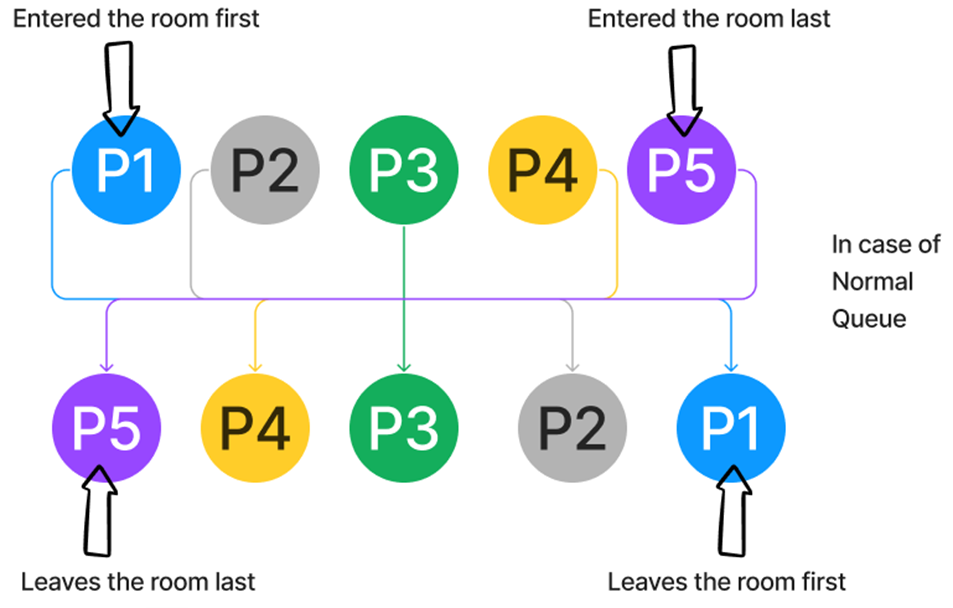

# Priority Queue
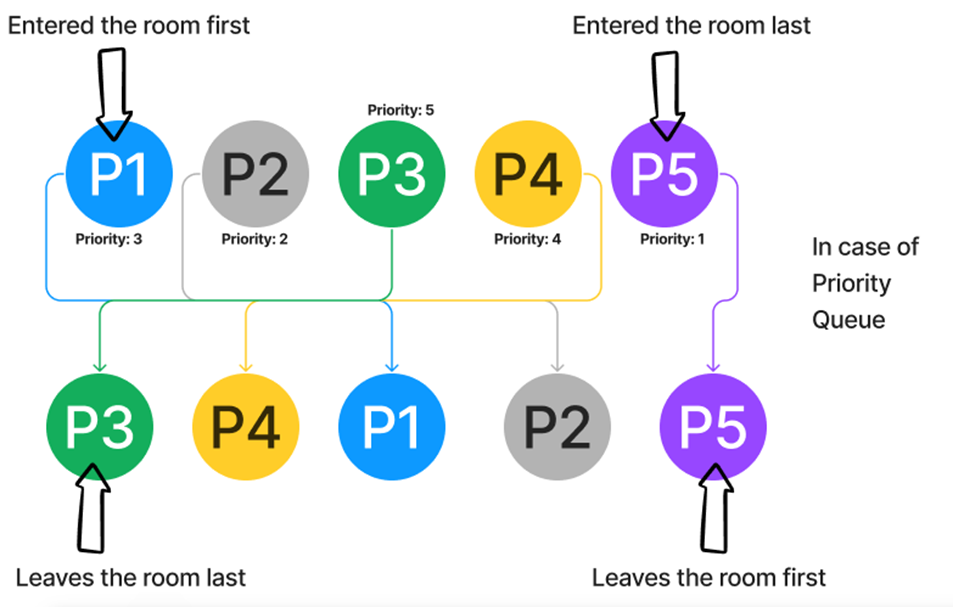

In [8]:

import threading

class EmptyListAccessException(Exception):
    pass


class Task:  # Tasks with a set priority
    def __init__(self, task, priority):
        self.task = task
        self.priority = priority

    def __lt__(self, other):
        return self.priority < other.priority

    def __repr__(self):
        return f"Task(priority={self.priority}, task={self.task})"


class PriorityQueue:
    def __init__(self, task=None):
        self.queue = []
        self.lock = threading.Lock()

        if task:
            self.queue.append(task)

    def enqueue(self, new_task):
        with self.lock:
            if not self.queue:
                self.queue.append(new_task)
                return

            for i, task in enumerate(self.queue):  # Inserting the task in sorted order
                if task.priority > new_task.priority:
                    self.queue.insert(i, new_task)
                    return

            self.queue.append(new_task)  # If the task was not inserted earlier, we add it at the end

    def dequeue(self):  # Dequeuing the element with the most priority.
        with self.lock:
            if not self.queue:
                return None
            self.queue.pop(0)

    def peek(self):  # Returns the element with the most priority without dequeuing the element if the queue isn't empty.
        with self.lock:
            if self.queue:
                return self.queue[0]
            else:
                return None

    def print_queue(self):  # Prints the queue with the priorities too.
        with self.lock:
            for task in self.queue:
                print(f"Priority: {task.priority}, Task: {task.task}")

    def is_empty(self):  # Checks if the queue is empty.
        with self.lock:
            if len(self.queue):
                return True

            else:
                return False

    def size(self):  # Checks the size of the queue.
        with self.lock:
            return len(self.queue)

    def clear(self):  #clears the queue.
        with self.lock:
            self.queue.clear()

    def contains(self, task):  # Checks if the task is in the queue.
        with self.lock:
            if task in self.queue:
                return True

            else:
                return False

    def get_priority(self, task_content):  # Gets the priority of a given task.
        with self.lock:
            for task in self.queue:
                if task.task == task_content:
                    return task.priority
            return -1

    def get_task(self, priority):  # Gets the first task the matches the priority.
        with self.lock:
            for task in self.queue:
                if task.priority == priority:
                    return task
            return None


In [9]:
pq = PriorityQueue()
pq.enqueue(Task("Do laundry", 3))
pq.enqueue(Task("Finish report", 1))
pq.enqueue(Task("Buy groceries", 2))

print("\nQueue after enqueuing:")
pq.print_queue()

print("\nDequeuing highest priority task")
pq.dequeue()
pq.print_queue()

print("\nPeeking at the highest priority task:")
print(pq.peek())

print(pq.get_priority("Buy groceries"))
pq.print_queue()


Queue after enqueuing:
Priority: 1, Task: Finish report
Priority: 2, Task: Buy groceries
Priority: 3, Task: Do laundry

Dequeuing highest priority task
Priority: 2, Task: Buy groceries
Priority: 3, Task: Do laundry

Peeking at the highest priority task:
Task(priority=2, task=Buy groceries)
2
Priority: 2, Task: Buy groceries
Priority: 3, Task: Do laundry


## Linked List: Structured Rule Automation System

### What is a Linked List?

A linear data structure where elements (nodes) are linked sequentially. It excels at dynamic insertion and deletion of elements.

### Why Use a Linked List for Automation Rules?

*   **Ordered Rule Execution:**  Automation rules often need to be executed in a specific sequence.
*   **Dynamic Rule Sets:** Easily add, remove, or modify rules without complex restructuring.

### Rule Execution Process

1. Rules are parsed from user input (or external sources) and converted into `Rule` objects.
2. `Rule` objects are added to the `LinkedList`.

# Normal List VS Linked List
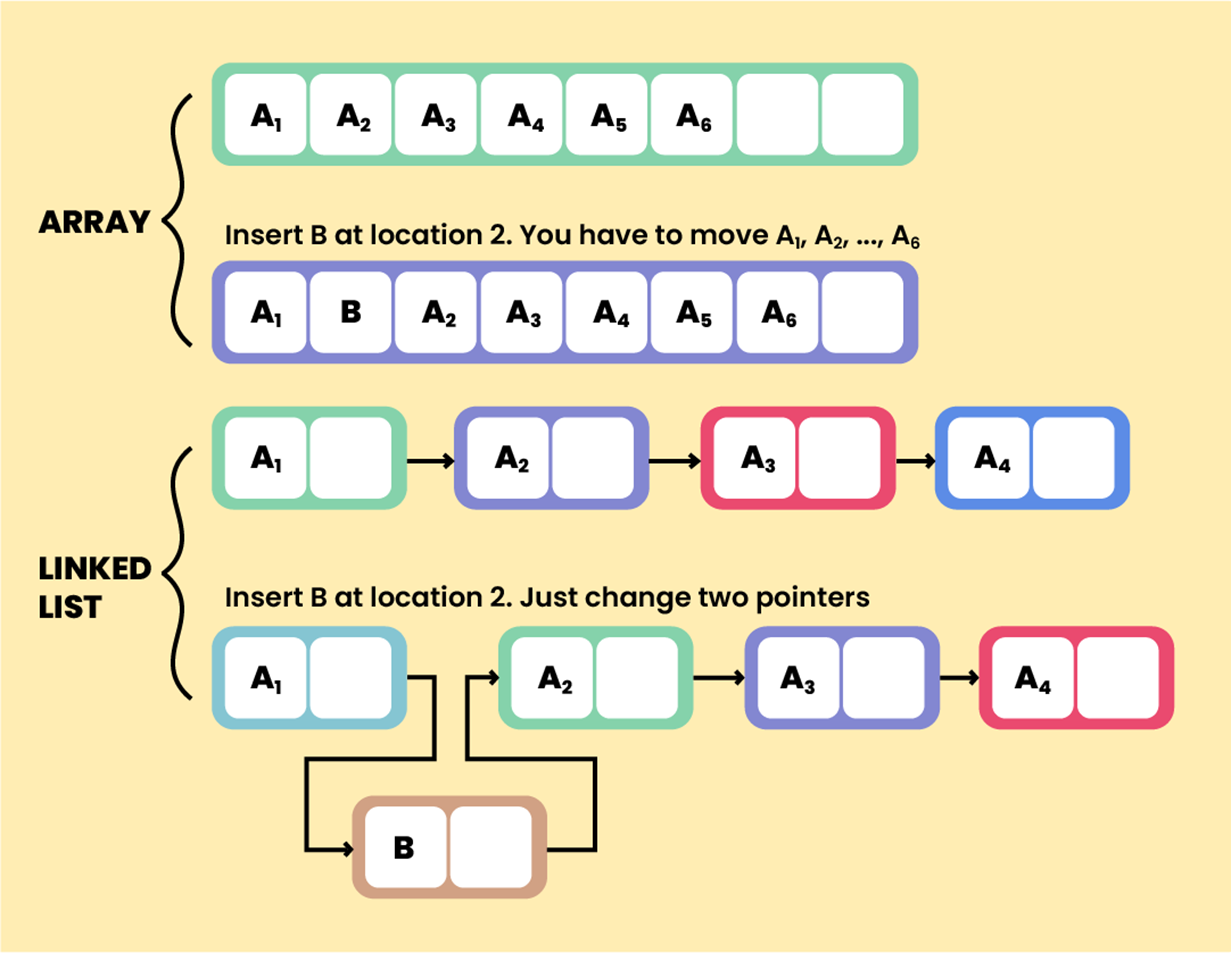

In [10]:
# LINKED LIST IMPLEMENTATION
# The threading library contains lock that helps us during multi threading operations.


class Node:  # For creation of a node. Each node contains the data and the address of the next node.
    def __init__(self, val):
        self.val = val
        self.next = None


class LinkedList:  # Linked list implementation.
    def __init__(self):
        self.head = None
        self.size = 0
        self.lock = threading.Lock()

    def add_front(self, val):  # Adding a node in the front of the linked list.
        with self.lock:
            new_node = Node(val)
            new_node.next = self.head
            self.head = new_node
            self.size += 1

    def add_end(self, val):  # Adding a node at the end of the linked list.
        new_node = Node(val)

        with self.lock:
            if not self.head:
                self.head = new_node

            else:
                temp = self.head
                while temp.next:
                    temp = temp.next
                temp.next = new_node
            self.size += 1

    def remove_front(self):  # Removes the node at the front of the linked list.
        with self.lock:
            if not self.head:
                return None
            val = self.head.val
            self.head = self.head.next
            self.size -= 1
            return val

    def remove_end(self):  # Removes the node at the end of the linked list.

        with self.lock:
            if not self.head:
                return None
            if not self.head.next:
                val = self.head.val
                self.head = None
                self.size -= 1
                return val

            temp = self.head
            while temp.next and temp.next.next:
                temp = temp.next

            val = temp.next.val
            temp.next = None
            self.size -= 1
            return val

    def peek(self):  # Gives us the data in the very first node without popping it.
        with self.lock:
            return self.head.val if self.head else None

    def peek_end(self):  # Gives us the data at the last node without popping it.
        with self.lock:
            if not self.head:
                return None
            temp = self.head
            while temp.next:
                temp = temp.next
            return temp.val

    def get_size(self):  # Gives us the size of the linked list.

        with self.lock:
            return self.size

    def print_list(self):  # Displays the entire list.

        with self.lock:
            temp = self.head
            while temp:
                print(temp.val, end=" -> ")
                temp = temp.next
            print("None")

    def clear(self):  # Clears the entire list.

        with self.lock:
            self.head = None
            self.size = 0

    def is_empty(self):  # Checks if the list is empty.

        with self.lock:
            return self.size == 0

    def peek_and_remove_end(self):  # Peek and pop the last element.
        with self.lock:
            if not self.head:
                return None  # List is empty

            if not self.head.next:
                val = self.head.val  # Only one element in the list
                self.head = None
                self.size -= 1
                return val

            temp = self.head
            while temp.next and temp.next.next:
                temp = temp.next

            val = temp.next.val  # Peek the last element
            temp.next = None  # Remove it
            self.size -= 1
            return val

    def peek_and_remove(self):  # Peeks and pops the first element
        with self.lock:
            if not self.head:
                return None  # List is empty
            val = self.head.val  # Peek the first element
            self.head = self.head.next  # Remove it
            self.size -= 1
            return val

    def sort_ll(self):
        with self.lock:
            temp_array = self._make_array_list()  # Convert linked list to a Python list
            temp_array.sort()  # Sort the list in ascending order
            self.clear()  # Clear the linked list

            for val in temp_array:  # Reinsert sorted elements into the linked list
                self.add_end(val)

    def _make_array_list(self):
        temp = self.head
        array_list = []

        while temp:
            array_list.append(temp.val)
            temp = temp.next

        return array_list

    def reverse(self):  # Reverses the array
        with self.lock:
            temp_array = self._make_array_list()
            temp_array.reverse()
            self.clear()

            for val in temp_array:
                self.add_end(val)



In [11]:
ll = LinkedList()
ll.add_end(10)
ll.add_end(20)
ll.add_front(5)
ll.print_list()
print(ll.remove_end())
print(ll.peek())
print(ll.get_size())
print(ll.peek_and_remove_end())
print(ll.peek_end())
print(ll.peek_and_remove_end())
ll.add_end(20)
print(ll.peek())
print(ll.peek_and_remove())

5 -> 10 -> 20 -> None
20
5
2
10
5
5
20
20


## Energy-Efficient Device Coordination

This system employs a two-pronged approach to optimize energy consumption:

### 1. Rule-Based Energy Optimization (Linked List)

*   Users can define energy-saving rules, such as:
    *   "If the time is after 11 PM and motion is not detected in the living room for 15 minutes, turn off the living room lights."
*   The `LinkedList` ensures that these rules are executed efficiently and in the correct order.

In [12]:
class Rule:
    def __init__(self, device_id, flip_state, turn_on, turn_off, set_power_level, power_level, group_name,
                 turn_group_off,
                 turn_group_on, type_name, turn_type_off, turn_type_on, location_name, turn_location_off,
                 turn_location_on):
        self.__deviceId = device_id
        self.__flipState = flip_state
        self.__turnOn = turn_on
        self.__turnOff = turn_off
        self.__setPowerLevel = set_power_level
        self.__powerLevel = power_level
        self.__groupName = group_name
        self.__turnGroupOff = turn_group_off
        self.__turnGroupOn = turn_group_on
        self.__typeName = type_name
        self.__turnTypeOff = turn_type_off
        self.__turnTypeOn = turn_type_on
        self.__locationName = location_name
        self.__turnLocationOff = turn_location_off
        self.__turnLocationOn = turn_location_on

    def get_device_id(self):
        return self.__deviceId

    def set_device_id(self, device_id):
        self.__deviceId = device_id

    def get_flip_state(self):
        return self.__flipState

    def set_flip_state(self, flip_state):
        self.__flipState = flip_state

    def get_turn_on(self):
        return self.__turnOn

    def set_turn_on(self, turn_on):
        self.__turnOn = turn_on

    def get_turn_off(self):
        return self.__turnOff

    def set_turn_off(self, turn_off):
        self.__turnOff = turn_off

    def get_set_power_level(self):
        return self.__setPowerLevel

    def set_set_power_level(self, set_power_level):
        self.__setPowerLevel = set_power_level

    def get_power_level(self):
        return self.__powerLevel

    def set_power_level(self, power_level):
        self.__powerLevel = power_level

    def get_group_name(self):
        return self.__groupName

    def set_group_name(self, group_name):
        self.__groupName = group_name

    def get_turn_group_off(self):
        return self.__turnGroupOff

    def set_turn_group_off(self, turn_group_off):
        self.__turnGroupOff = turn_group_off

    def get_turn_group_on(self):
        return self.__turnGroupOn

    def set_turn_group_on(self, turn_group_on):
        self.__turnGroupOn = turn_group_on

    def get_type_name(self):
        return self.__typeName

    def set_type_name(self, type_name):
        self.__typeName = type_name

    def get_turn_type_off(self):
        return self.__turnTypeOff

    def set_turn_type_off(self, turn_type_off):
        self.__turnTypeOff = turn_type_off

    def get_turn_type_on(self):
        return self.__turnTypeOn

    def set_turn_type_on(self, turn_type_on):
        self.__turnTypeOn = turn_type_on

    def get_location_name(self):
        return self.__locationName

    def set_location_name(self, location_name):
        self.__locationName = location_name

    def get_turn_location_off(self):
        return self.__turnLocationOff

    def set_turn_location_off(self, turn_location_off):
        self.__turnLocationOff = turn_location_off

    def get_turn_location_on(self):
        return self.__turnLocationOn

    def set_turn_location_on(self, turn_location_on):
        self.__turnLocationOn = turn_location_on

    def __str__(self):
        return f"Rule(deviceId={self.__deviceId}, flipState={self.__flipState}, turnOn={self.__turnOn}, turnOff={self.__turnOff}, setPowerLevel={self.__setPowerLevel}, powerLevel={self.__powerLevel}, groupName={self.__groupName}, turnGroupOff={self.__turnGroupOff}, turnGroupOn={self.__turnGroupOn}, typeName={self.__typeName}, turnTypeOff={self.__turnTypeOff}, turnTypeOn={self.__turnTypeOn}, locationName={self.__locationName}, turnLocationOff={self.__turnLocationOff}, turnLocationOn={self.__turnLocationOn})"

    def to_dict(self):
        # Simply return a dictionary of the attributes
        return {
            "device_id": self.__deviceId,
            "flip_state": self.__flipState,
            "turn_on": self.__turnOn,
            "turn_off": self.__turnOff,
            "set_power_level_flag": self.__setPowerLevel, # Renamed for clarity
            "power_level_value": self.__powerLevel,       # Renamed for clarity
            "group_name": self.__groupName,
            "turn_group_off": self.__turnGroupOff,
            "turn_group_on": self.__turnGroupOn,
            "type_name": self.__typeName,
            "turn_type_off": self.__turnTypeOff,
            "turn_type_on": self.__turnTypeOn,
            "location_name": self.__locationName,
            "turn_location_off": self.__turnLocationOff,
            "turn_location_on": self.__turnLocationOn
        }
    
#TESTING
rule = Rule("123", True, False, True, False, 0, "Living Room", False, True, "Light", False, True, "Home", False, True)
print(rule)

Rule(deviceId=123, flipState=True, turnOn=False, turnOff=True, setPowerLevel=False, powerLevel=0, groupName=Living Room, turnGroupOff=False, turnGroupOn=True, typeName=Light, turnTypeOff=False, turnTypeOn=True, locationName=Home, turnLocationOff=False, turnLocationOn=True)


### 2. Priority Queue Driven Power Management

*   **Monitoring:** The system continuously monitors overall power consumption against a predefined threshold.
*   **Threshold Exceeded:** If the power consumption threshold is exceeded, the `Priority Queue` identifies devices with lower priority.
*   **Dynamic Rule Generation:** The system automatically creates and adds rules to the `LinkedList` to reduce power consumption for lower-priority devices. These rules might involve:
    *   Turning off the device.
    *   Reducing the power level (e.g., dimming lights).
*   **Dynamic Adaptation:** The system continuously adapts to power usage, adjusting device states based on priority and rules to maintain energy efficiency in real-time.


In [13]:
from enum import Enum
import time

class Device:
    def __init__(self, device_id, device_name, device_type, location, device_group, battery_level, max_battery_capacity,current_battery_capacity, is_on_battery, is_turned_on, base_power_consumption, power_level,turned_on_time, is_interacted):
        self.__device_id = device_id
        self.__device_name = device_name
        self.__device_type = device_type
        self.__location = location
        self.__device_group = device_group
        self.__battery_level = battery_level
        self.__max_battery_capacity = max_battery_capacity
        self.__current_battery_capacity = current_battery_capacity
        self.__is_on_battery = is_on_battery
        self.__is_turned_on = is_turned_on
        self.__base_power_consumption = base_power_consumption
        self.__power_level = power_level
        self.__turned_on_time = turned_on_time
        self.__is_interacted = is_interacted

    def flip_interaction_state(self):
        self.__is_interacted = not self.__is_interacted

    def get_interaction_state(self) -> bool:
        return self.__is_interacted

    def get_minutes_since_turned_on(self):
        if self.__turned_on_time:
            return int((int(time.time()) - self.__turned_on_time) // 60)
        return 0

    def set_turned_on(self, status: bool):
        self.__is_turned_on = status

    def is_turned_on(self) -> bool:
        return self.__is_turned_on

    def set_battery_level(self, level: float):
        self.__battery_level = level

    def get_battery_level(self) -> float:
        return self.__battery_level

    def set_base_power_consumption(self, consumption: float):
        self.__base_power_consumption = consumption

    def get_base_power_consumption(self) -> float:
        return self.__base_power_consumption

    def set_battery_capacity(self, capacity: int):
        self.__max_battery_capacity = capacity

    def get_battery_capacity(self) -> int:
        return self.__max_battery_capacity

    def get_device_id(self) -> int:
        return self.__device_id

    def get_device_name(self) -> str:
        return self.__device_name

    def set_device_name(self, name: str):
        self.__device_name = name

    def get_device_type(self):
        return self.__device_type

    def set_device_type(self, type_: str):
        self.__device_type = type_

    def get_location(self):
        return self.__location

    def set_location(self, location: str):
        self.__location = location

    def get_device_group(self):
        return self.__device_group

    def set_device_group(self, group: str):
        self.__device_group = group

    def get_power_level(self) -> int:
        return self.__power_level

    def set_power_level(self, level: int):
        self.__power_level = level

    def is_on_battery_power(self) -> bool:
        return self.__is_on_battery

    def set_on_battery(self, status: bool):
        self.__is_on_battery = status

    def get_current_battery_capacity(self) -> float:
        return self.__current_battery_capacity

    def set_current_battery_capacity(self, capacity: float):
        self.__current_battery_capacity = capacity

    def set_turned_on_time(self, time: int):
        self.__turned_on_time = time

    def get_turned_on_time(self) -> int:
        return self.__turned_on_time

    def __str__(self):
        return (f"Device ID: {self.get_device_id()}\n"
                f"Device Name: {self.get_device_name()}\n"
                f"Device Type: {self.get_device_type()}\n"
                f"Device Group: {self.get_device_group()}\n"
                f"Location: {self.get_location()}\n"
                f"Power Status: {'On' if self.is_turned_on() else 'Off'}\n"
                f"Battery Level: {self.get_battery_level()}\n"
                f"Power Consumption: {self.get_base_power_consumption()} W\n"
                f"Power Level: {self.get_power_level()}\n")
    def to_dict(self):
    
        def safe_json_val(val):
            if isinstance(val, Enum):
                if isinstance(val, DeviceLocationEnum):
                    return val.value
                else:
                    return val.name # e.g., "DECORATIVE", "LIGHTS"
            elif val is None:
                    return None 
            else:
                    return val

        return {
            'device_id': self.get_device_id(),
            'device_name': self.get_device_name(),
            'device_type': safe_json_val(self.get_device_type()),
            'location': safe_json_val(self.get_location()),
            'device_group': safe_json_val(self.get_device_group()),
            'battery_level': self.get_battery_level(),
            'max_battery_capacity': self.get_battery_capacity(),
            'current_battery_capacity': self.get_current_battery_capacity(),
            'is_on_battery': self.is_on_battery_power(),
            'is_turned_on': self.is_turned_on(),
            'base_power_consumption': self.get_base_power_consumption(),
            'power_level': self.get_power_level(),
            'turned_on_time': self.get_turned_on_time(), # Keep as timestamp or None
            'minutes_since_turned_on': self.get_minutes_since_turned_on(), # Add convenience field
            'is_interacted': self.get_interaction_state()
        }

#Test

device1 = Device(
    device_id=1,
    device_name="Light",
    device_type="Decorative",
    location="Living Room",
    device_group="LIGHTS",
    battery_level=85.0,
    max_battery_capacity=100,
    current_battery_capacity=85.0,
    is_on_battery=False,
    is_turned_on=True,
    base_power_consumption=10.0,
    power_level=5,
    turned_on_time=int(time.time()),
    is_interacted=False,

)

print(device1)

device1.set_battery_level(90.0)
device1.set_power_level(8)
device1.flip_interaction_state()

print(f"Battery Level after update: {device1.get_battery_level()}")
print(f"Power Level after update: {device1.get_power_level()}")
print(f"Interaction State: {device1.get_interaction_state()}")
print(f"Minutes since turned on: {device1.get_minutes_since_turned_on()} min")


Device ID: 1
Device Name: Light
Device Type: Decorative
Device Group: LIGHTS
Location: Living Room
Power Status: On
Battery Level: 85.0
Power Consumption: 10.0 W
Power Level: 5

Battery Level after update: 90.0
Power Level after update: 8
Interaction State: True
Minutes since turned on: 0 min


In [14]:
class AirConditioner(Device):
    def __init__(self, device_name, device_type, device_group, location, is_turned_on, battery_level, power_consumption,
                 max_battery_capacity, power_level, mode):
        super().__init__(device_name, device_type, device_group, location, is_turned_on, battery_level,
                         power_consumption, max_battery_capacity, power_level)
        self.__mode = mode
        self.__simulation_temp_change_time = 0

    def get_mode(self) -> bool:
        return self.__mode

    def set_mode(self, mode: bool):
        self.__mode = mode

    def toggle_mode(self):
        self.__mode = not self.__mode

    def get_simulation_temp_change_time(self) -> int:
        return self.__simulation_temp_change_time

    def set_simulation_temp_change_time(self, simulation_temp_change_time: int):
        self.__simulation_temp_change_time = simulation_temp_change_time

    def get_minutes_since_temp_change(self) -> int:
        return int((int(time.time()) - self.__simulation_temp_change_time) // 60)

    def __str__(self) -> str:
        return super().__str__() + " Mode: " + ("Cooling" if self.__mode else "Heating")


### 3. Enum Based Priority Calculation

*   **Easy Modification:** Modifying priority values is as simple as changing one number
*   **Fast and Easy Calculation:** All priority values can be accessed and calculated very easily
*   **Ease of Use** User does not have to manually include priority values for every single device added

In [15]:
from enum import Enum


class DeviceGroupEnum(Enum):
    LIGHTS = 10
    FANS = 9
    ALARMS = 15
    CAMERAS = 14
    AIRCONDITIONERS = 8
    HEATERS = 8
    APPLIANCES = 6
    GARDENING = 3
    ENTERTAINMENT = 2
    CLEANING = 5
    LAUNDRY = 4
    WEARABLES = 7
    BATHROOM = 12
    OTHERS = 1

    dict = {"abc": 1}

    def get_priority(self):
        return self.value


class DeviceGroup:
    def __init__(self, group_name: str):
        self.group_name = group_name
        self.devices = []

    def add_device(self, device: Device):
        self.devices.append(device)

    def remove_device(self, device: Device):
        if device in self.devices:
            self.devices.remove(device)

    def get_devices(self):
        return self.devices

    def turn_off_all_devices(self):
        for device in self.devices:
            device.set_turned_on(False)

    def turn_on_all_devices(self):
        for device in self.devices:
            device.set_turned_on(True)

    def get_device_by_name(self, name: str):
        name_lower = name.lower()
        return next((device for device in self.devices if name_lower in device.get_device_name().lower()), None)

    def get_device_by_id(self, device_id: int):
        return next((device for device in self.devices if device.get_device_id() == device_id), None)

    def get_group_name(self):
        return self.group_name

In [16]:
from enum import Enum


class DeviceTypeEnum(Enum):
    DECORATIVE = 1,
    HEALTH = 15,
    ENTERTAINMENT = 3,
    SECURITY = 20,
    PERSONALCARE = 7,
    CONNECTIVITY = 10,
    COOKING = 12,
    LUXURY = 2,
    OFFICE = 10,
    OTHERS = 5

    def get_priority(self):
        return self.value


class DeviceType:
    def __init__(self, typeName: str):
        self.typeName = typeName
        self.devices = []

    def add_device(self, device: Device):
        self.devices.append(device)

    def remove_device(self, device: Device):
        if device in self.devices:
            self.devices.remove(device)

    def get_devices(self):
        return self.devices

    def turn_off_all_devices(self):
        for device in self.devices:
            device.set_turned_on(False)

    def turn_on_all_devices(self):
        for device in self.devices:
            device.set_turned_on(True)

    def get_device_by_name(self, name: str):
        name_lower = name.lower()
        return next((device for device in self.devices if name_lower in device.get_device_name().lower()), None)

    def get_device_by_id(self, device_id: int):
        return next((device for device in self.devices if device.get_device_id() == device_id), None)



In [17]:
from enum import Enum


class DeviceLocationEnum(Enum):
    LIVINGROOM = "Living Room"
    BEDROOM = "Bedroom"
    BEDROOM2 = "Bedroom 2"
    BEDROOM3 = "Bedroom 3"
    BEDROOM4 = "Bedroom 4"
    GARDEN = "Garden"
    OFFICE = "Office"
    ENTRANCE = "Entrance"
    KITCHEN = "Kitchen"
    BATHROOM = "Bathroom"
    BATHROOM2 = "Bathroom 2"
    BATHROOM3 = "Bathroom 3"
    OTHERS = "Others"


class DeviceLocation:
    def __init__(self, location: str):
        self.location = location
        self.devices = []
        self.people = 0
        self.temperature = 0.0

    def add_device(self, device: Device):

        self.devices.append(device)

    def remove_device(self, device: Device):

        if device in self.devices:
            self.devices.remove(device)

    def get_devices(self):

        return self.devices

    def get_people(self):
        return self.people

    def set_people(self, people: int):
        self.people = people

    def add_people(self, people: int):
        self.people += people

    def remove_people(self, people: int):
        self.people = max(0, self.people - people)

    def turn_off_all_devices(self):

        for device in self.devices:
            device.set_turned_on(False)

    def turn_on_all_devices(self):

        for device in self.devices:
            device.set_turned_on(True)

    def get_temperature(self):
        return self.temperature

    def set_temperature(self, temperature: float):
        self.temperature = temperature

    def get_device_by_name(self, name: str):

        name_lower = name.lower()
        return next((device for device in self.devices if name_lower in device.get_device_name().lower()), None)

    def get_device_by_id(self, device_id: int):

        return next((device for device in self.devices if device.get_device_id() == device_id), None)

    def __str__(self):
        return f"Location: {self.location}"

### 4. Logging system

*   **Log Monitoring:** Displays system logs for transparency and debugging, including:
    *   Info logs
    *   Warning logs
    *   Severe logs
    *   Power logs
    *   Battery logs

In [18]:
import logging


class LogTask:
    LEVEL_LIST = [
        logging.ERROR,
        logging.CRITICAL,
        logging.WARNING,
        logging.INFO
    ]

    def __init__(self, log_level, message):
        self.logLevel = log_level
        self.message = message

    def get_log_level(self):
        return self.logLevel

    def get_message(self):
        return self.message

    def set_log_level(self, log_level):
        self.logLevel = log_level

    def set_message(self, message):
        self.message = message
    
    def to_dict(self):
        return {
            "level": logging.getLevelName(self.logLevel),
            "message": self.message
        }


#Exceptions


In [19]:
class RuleParsingException(Exception):

    def __init__(self, message: str = "Rule parsing error", cause: Exception | None = None):
        super().__init__(message)
        self.cause = cause

    def __str__(self) -> str:
        return f"RuleParsingException: {super().__str__()}"

### SmartHome.py Overview

**Integrating code**
- Acts as the primary controller, integrating all device and data structure functionalities  
- Manages device objects for efficient monitoring and control  
- Enforces power consumption thresholds to optimize energy usage  
- Maintains, checks, and updates battery levels across connected devices  

**Logging**
- Logs key events, enhancing transparency and debugging  

**Priority Management**
- Coordinates with the Priority Queue to handle high-priority device tasks  
- Leverages the Linked List to manage and execute automation rules in a defined order  
- Ensures continuous, coordinated operation among devices, rules, and system events

In [20]:
import logging
import random
import threading
import time
from concurrent.futures import ThreadPoolExecutor


class SmartHome:

    def __init__(self, threshold: float, ideal_temp: int, simulate: bool):

        self.tick_count = 0
        self.threshold = threshold
        self.ideal_temp = ideal_temp
        self.simulate = simulate
        self.power_consumption = 1.0
        self.mode = "Normal"
        self.date = time.time()
        self.lock = threading.Lock()
        self.random = random.Random()

        self.group_map: dict[str, DeviceGroup] = {}
        self.type_map: dict[str, DeviceType] = {}
        self.location_map: dict[str, DeviceLocation] = {}

        self.powered_on_devices: list[Device] = []
        self.powered_off_devices: list[Device] = []

        self.device_queue: PriorityQueue = PriorityQueue()
        self.power_reducible_devices = PriorityQueue()
        self.turn_back_on_devices = PriorityQueue()

        self.logging_list = LinkedList()
        self.power_consumption_log_list: LinkedList = LinkedList()
        self.device_battery_log_list = LinkedList()

        self.rule_list = LinkedList()

        self.info_tasks: list[str] = []
        self.warning_tasks: list[str] = []
        self.severe_tasks: list[str] = []
        self.power_consumption_tasks: list[str] = []
        self.device_battery_tasks: list[str] = []
        logging.basicConfig(
            level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
        )
        self.power_consumption_logger = logging.getLogger("PowerConsumptionLog")
        self.logger = logging.getLogger(__name__)
        self.device_battery_logger = logging.getLogger("DeviceBatteryLog")

        # Thread control
        self.tick_thread = None
        self.logging_thread = None
        self.rule_thread = None

        self.tick_running = False
        self.logging_running = False
        self.rule_running = False

        self.initialize_logger()
        self._initialize()
        self._initialize_scheduler()

    def _initialize(self):

        for deviceGroup in DeviceGroupEnum:
            self.group_map[deviceGroup.name] = DeviceGroup(deviceGroup.name)

        for deviceType in DeviceTypeEnum:
            self.type_map[deviceType.name] = DeviceType(deviceType.name)

        for location in DeviceLocationEnum:
            devLocation = DeviceLocation(location.name)
            self.location_map[location.name] = devLocation
            devLocation.temperature = self.random.randint(10, 45)

    # ========================================================================
    # Device Management
    # ========================================================================

    def _add_to_group_and_type(self, deviced: Device):

        self.group_map[deviced.get_device_group().name].add_device(deviced)
        self.type_map[deviced.get_device_type().name].add_device(deviced)
        self.location_map[deviced.get_location().name].add_device(deviced)

    def create_device(
            self,
            device_name: str,
            device_type: DeviceTypeEnum,
            device_group: DeviceGroupEnum,
            location: DeviceLocationEnum,
            is_turned_on: bool = False,
            battery_level: float = 0.0,
            power_consumption: float = 0.0,
            max_battery_capacity: int = 0,
            power_level: int = 1,
    ) -> Device:
        return Device(
            device_id=len(self.get_devices()) + 1,  #Simple ID assignment
            device_name=device_name,
            device_type=device_type,
            location=location,
            device_group=device_group,
            is_turned_on=is_turned_on,
            battery_level=battery_level,
            base_power_consumption=power_consumption,
            max_battery_capacity=max_battery_capacity,
            current_battery_capacity=max_battery_capacity,
            power_level=power_level,
            is_on_battery= battery_level > 0,
            turned_on_time=int(time.time()) if is_turned_on else 0,
            is_interacted=False,
        )

    def add_device(self, device: Device):

        if device.is_turned_on():
            self.powered_on_devices.append(device)
            device.set_turned_on_time(int(time.time()))

            if device.get_device_type().get_priority()[0] == float("inf"):
                return
            location = self.location_map[device.get_location().name]

            self.device_queue.enqueue(
                Task(device, device.get_device_type().get_priority()[
                    0] + device.get_device_group().get_priority() + location.people * 10)
            )

            if device.get_power_level() != 0:
                if device.get_device_type().get_priority()[0] == float("inf"):
                    return
                location = self.location_map[device.get_location().name]

                self.power_reducible_devices.enqueue(
                    Task(
                        device,
                        device.get_device_type().get_priority()[0]
                        + device.get_device_group().get_priority()
                        + (location.people * 10),
                    )
                )
        else:
            self.powered_off_devices.append(device)
        self._add_to_group_and_type(device)

    def turn_on_device(self, device: Device):

        device.set_turned_on(True)

        if device not in self.powered_on_devices:
            self.powered_on_devices.append(device)
            device.set_turned_on_time(int(time.time()))

        if device in self.powered_off_devices:
            self.powered_off_devices.remove(device)
        if device.get_device_type().get_priority()[0] == float("inf"):
            return
        location = self.location_map[device.get_location().name]

        self.device_queue.enqueue(
            Task(
                device,
                device.get_device_type().get_priority()[0]
                + device.get_device_group().get_priority()
                + (location.people * 10),
            )
        )
        if device.get_power_level() != 0:
            if device.get_device_type().get_priority()[0] == float("inf"):
                return
            location = self.location_map[device.get_location().name]

        self.power_reducible_devices.enqueue(
            Task(
                device,
                device.get_device_type().get_priority()[0]
                + device.get_device_group().get_priority()
                + (location.people * 10),
            )
        )

    def turn_off_device(self, device: Device):

        device.set_turned_on(False)
        if device not in self.powered_off_devices:
            self.powered_off_devices.append(device)

        if device in self.powered_on_devices:
            self.powered_on_devices.remove(device)

        self.device_queue.queue = [task for task in self.device_queue.queue if task.task != device]
        self.power_reducible_devices.queue = [task for task in self.power_reducible_devices.queue if
                                              task.task != device]

    def remove_device(self, device: Device):

        if device in self.powered_on_devices:
            self.powered_on_devices.remove(device)
        if device in self.powered_off_devices:
            self.powered_off_devices.remove(device)
        self.group_map[device.get_device_group().name].remove_device(device)
        self.type_map[device.get_device_type().name].remove_device(device)
        self.location_map[device.get_location().name].remove_device(device)

    def get_device_by_name(self, name: str) -> Device | None:

        for device in self.powered_on_devices:
            if device.get_device_name().lower() == name.lower():
                return device
        for device in self.powered_off_devices:
            if device.get_device_name().lower() == name.lower():
                return device
        return None

    def get_device_by_id(self, device_id: int) -> Device | None:

        for device in self.powered_on_devices:
            if device.get_device_id() == device_id:
                return device
        for device in self.powered_off_devices:
            if device.get_device_id() == device_id:
                return device
        return None

    def turn_off_devices_by_group(self, group_name: str):

        for device in self.group_map[group_name].devices:
            self.turn_off_device(device)

    def turn_on_devices_by_group(self, group_name: str):

        for device in self.group_map[group_name].devices:
            self.turn_on_device(device)

    def turn_off_devices_by_type(self, type_name: str):

        for device in self.type_map[type_name].devices:
            self.turn_off_device(device)

    def turn_on_devices_by_type(self, type_name: str):

        for device in self.type_map[type_name].devices:
            self.turn_on_device(device)

    def turn_off_devices_by_location(self, location_name: str):

        for device in self.location_map[location_name].devices:
            self.turn_off_device(device)

    def turn_on_devices_by_location(self, location_name: str):

        for device in self.location_map[location_name].devices:
            self.turn_on_device(device)

    def turn_off_all_devices(self):

        for device in list(self.powered_on_devices):
            self.turn_off_device(device)

    def turn_on_all_devices(self):

        for device in list(self.powered_off_devices):
            self.turn_on_device(device)

    def get_device(self, identifier: str | int) -> Device | None:

        if isinstance(identifier, int):
            return self.get_device_by_id(identifier)
        elif isinstance(identifier, str):
            return self.get_device_by_name(identifier)
        else:
            return None

    def add_person(self, location: DeviceLocationEnum):

        if isinstance(location, DeviceLocationEnum):
            location_obj = self.location_map[location.name]
        else:
            location_obj = location

        location_obj.add_people(1)
        for device in location_obj.devices:
            if device.is_turned_on():
                for i, task in enumerate(self.device_queue.queue):
                    if task.task == device:
                        new_priority = task.priority + 10
                        self.device_queue.queue[i] = Task(device, new_priority)
                        break
                self.device_queue.queue.sort()  # Re-sort after updating priority

    def remove_person(self, location: DeviceLocationEnum):

        if isinstance(location, DeviceLocationEnum):
            location_obj = self.location_map[location.name]
        else:
            location_obj = location

        if location_obj.people == 0:
            return

        location_obj.remove_people(1)

        for device in location_obj.devices:
            if device.is_turned_on():
                for i, task in enumerate(self.device_queue.queue):
                    if task.task == device:
                        new_priority = task.priority - 10
                        self.device_queue.queue[i] = Task(device, new_priority)
                        break
        self.device_queue.queue.sort()

    # ========================================================================
    # Tick and Scheduling
    # ========================================================================

    def _initialize_scheduler(self):

        self.scheduler = ThreadPoolExecutor(max_workers=3)
        self.start_tick()
        self.logger.info("Tick started")
        self.start_logging()
        self.logger.info("Logging started")
        self.start_rule_execution()

    def start_tick(self):
        if not self.tick_running:
            self.tick_running = True
            self.tick_thread = self.scheduler.submit(self._run_tick_periodically)

    def _run_tick_periodically(self):
        while self.tick_running:
            start_time = time.time()
            try:
                self.tick()
            except Exception as e:
                self.logger.error(f"Error during tick execution: {e}")
                self.logger.exception(e)
            end_time = time.time()
            execution_time = end_time - start_time
            sleep_time = max(0, 1 - execution_time)
            time.sleep(sleep_time)

    def stop_tick(self):
        if self.tick_running:
            self.tick_running = False
            if self.tick_thread:
                self.tick_thread.cancel()
                self.tick_thread = None

    def tick(self):
        try:
            self.tick_task()
        except Exception as e:
            self.logger.error(f"Error during tick execution: {e}")
            self.logger.exception(e)

    def check_power_consumption(self):

        curr_power_consumption = self.calculate_current_power_consumption()

        if curr_power_consumption > self.threshold:
            reduce_power_task = self.power_reducible_devices.dequeue()
            if reduce_power_task is not None:
                device = reduce_power_task.task

                if (
                        curr_power_consumption
                        - (device.get_base_power_consumption() * (device.get_power_level() - 1))
                        > self.threshold
                ):
                    self.power_reducible_devices.enqueue(reduce_power_task)
                    remove_task = self.device_queue.dequeue()
                    if remove_task is not None:
                        remove_device = remove_task.task

                        self.logger.info(
                            f"Reducing power consumption by turning off {device.get_device_name()}"
                        )

                        self.turn_off_device(remove_device)
                        self.turn_back_on_devices.enqueue(
                            Task(device, -remove_task.priority)
                        )
                else:
                    device.set_power_level(1)

        else:
            turn_back_on_task = self.turn_back_on_devices.dequeue()
            if turn_back_on_task is not None:
                turn_back_on_device = turn_back_on_task.task
                if (curr_power_consumption + (
                        turn_back_on_device.get_base_power_consumption() * turn_back_on_device.get_power_level()) > self.threshold):
                    self.logger.info(
                        f"Not turning back on {turn_back_on_task.task.get_device_name()}"
                    )
                    turn_back_on_task.priority = turn_back_on_task.priority + 3
                    self.turn_back_on_devices.enqueue(turn_back_on_task)
                    return
                self.logger.info(
                    f"Turning back on {turn_back_on_task.task.get_device_name()}"
                )

                self.turn_on_device(turn_back_on_device)

    def tick_task(self):

        self.tick_count += 1
        if self.tick_count % 2 == 0:
            try:
                if self.simulate:
                    self.simulate_device_change()
                self.realistic_power_consumption()
            except Exception as e:
                self.logger.error(f"Error during deviceChange execution: {e}")
                self.logger.exception(e)
        try:
            self.log_power_consumption()
            self.reduce_battery_tick()
            self.check_each_device()
            self.check_each_location()
            self.check_power_consumption()
        except Exception as e:
            self.logger.error(f"Error during tickTask execution: {e}")
            self.logger.exception(e)

    def start_rule_execution(self):
        if not self.rule_running:
            self.rule_running = True
            self.rule_thread = self.scheduler.submit(self._run_execute_rules_periodically)

    def _run_execute_rules_periodically(self):
        while self.rule_running:
            start_time = time.time()
            try:
                self.execute_rules()
            except Exception as e:
                self.logger.error(f"Error during rule execution: {e}")
                self.logger.exception(e)
            end_time = time.time()
            execution_time = end_time - start_time
            sleep_time = max(0, 1 - execution_time)
            time.sleep(sleep_time)

    def execute_rules(self):

        curr_rule = self.rule_list.peek_and_remove()
        while curr_rule is not None:
            self.execute_rule(curr_rule)
            curr_rule = self.rule_list.peek_and_remove()

    def execute_rule(self, curr_rule):
        device = self.get_device(curr_rule.get_device_id())
        if device is None:
            raise RuleParsingException("Device not found")
        if curr_rule.is_flip_state():
            device.set_turned_on(not device.is_turned_on())
        elif curr_rule.is_set_power_level():
            if curr_rule.get_power_level() > 5 or curr_rule.get_power_level() < 0:
                raise RuleParsingException("Invalid power level")
            device.set_power_level(curr_rule.get_power_level())
        elif curr_rule.is_turn_on():
            self.turn_on_device(device)
        elif curr_rule.is_turn_off():
            self.turn_off_device(device)
        elif curr_rule.is_turn_group_on():
            self.turn_off_devices_by_group(curr_rule.get_group_name())
        elif curr_rule.is_turn_group_off():
            self.turn_on_devices_by_group(curr_rule.get_group_name())
        elif curr_rule.is_turn_type_on():
            self.turn_off_devices_by_type(curr_rule.get_type_name())
        elif curr_rule.is_turn_type_off():
            self.turn_on_devices_by_type(curr_rule.get_type_name())
        elif curr_rule.is_turn_location_on():
            self.turn_off_devices_by_location(curr_rule.get_location_name())
        elif curr_rule.is_turn_location_off():
            self.turn_on_devices_by_location(curr_rule.get_location_name())

    def stop_rule_execution(self):
        if self.rule_running:
            self.rule_running = False
            if self.rule_thread:
                self.rule_thread.cancel()
                self.rule_thread = None

    # ========================================================================
    # Logging
    # ========================================================================

    def initialize_logger(self):

        try:
            self.power_consumption_logger.setLevel(logging.INFO)
            power_consumption_file_handler = logging.FileHandler("PowerConsumption.log")
            power_consumption_file_handler.setLevel(logging.INFO)
            power_consumption_file_handler.setFormatter(logging.Formatter("%(asctime)s - %(message)s"))

            info_file_handler = logging.FileHandler("Info.log")
            info_file_handler.setLevel(logging.INFO)
            info_file_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
            # infoFileHandler.addFilter(lambda record: record.levelno == logging.INFO) # Removed Lambda filters

            warning_file_handler = logging.FileHandler("Warning.log")
            warning_file_handler.setLevel(logging.WARNING)
            warning_file_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
            # warningFileHandler.addFilter(lambda record: record.levelno == logging.WARNING)

            severe_file_handler = logging.FileHandler("Severe.log")
            severe_file_handler.setLevel(logging.CRITICAL)
            severe_file_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
            # severeFileHandler.addFilter(lambda record: record.levelno == logging.CRITICAL)

            self.device_battery_logger.setLevel(logging.INFO)
            device_battery_file_handler = logging.FileHandler("DeviceBattery.log")
            device_battery_file_handler.setLevel(logging.INFO)
            device_battery_file_handler.setFormatter(logging.Formatter("%(asctime)s - %(message)s"))

            self.logger.addHandler(info_file_handler)
            self.logger.addHandler(warning_file_handler)
            self.logger.addHandler(severe_file_handler)
            self.power_consumption_logger.addHandler(power_consumption_file_handler)
            self.device_battery_logger.addHandler(device_battery_file_handler)

            # Prevent duplicate logging
            self.power_consumption_logger.propagate = False
            self.logger.propagate = False
            self.device_battery_logger.propagate = False

        except Exception as e:
            print(e)

    def start_logging(self):
        if not self.logging_running:
            self.logging_running = True
            self.logging_thread = self.scheduler.submit(self._run_log_periodically)

    def _run_log_periodically(self):
        while self.logging_running:
            start_time = time.time()
            try:
                self.log()
            except Exception as e:
                self.logger.error(f"Error during log execution: {e}")
                self.logger.exception(e)
            end_time = time.time()
            execution_time = end_time - start_time
            sleep_time = max(0, 2 - execution_time)
            time.sleep(sleep_time)

    def log(self):

        task = self.logging_list.peek_and_remove()
        power_task = self.power_consumption_log_list.peek_and_remove()
        battery_task = self.device_battery_log_list.peek_and_remove()

        while task is not None:
            self.logger.log(task.logLevel, task.message)
            task = self.logging_list.peek_and_remove()

        while power_task is not None:
            self.power_consumption_logger.log(power_task.logLevel, power_task.message)
            power_task = self.power_consumption_log_list.peek_and_remove()

        while battery_task is not None:
            self.device_battery_logger.log(battery_task.logLevel, battery_task.message)
            battery_task = self.device_battery_log_list.peek_and_remove()

    def add_log(self, log_level, message):

        if log_level == logging.INFO:
            self.info_tasks.append(message)

        elif log_level == logging.WARNING:
            self.warning_tasks.append(message)

        elif log_level == logging.CRITICAL:
            self.severe_tasks.append(message)
        self.logging_list.add_end(LogTask(log_level, message))

    def add_power_log(self, log_level, message):

        self.power_consumption_log_list.add_end(LogTask(log_level, message))
        self.power_consumption_tasks.append(message)
        if log_level != logging.INFO:
            self.add_log(log_level, message)

    def add_battery_log(self, log_level, message):

        self.device_battery_log_list.add_end(LogTask(log_level, message))
        self.device_battery_tasks.append(message)
        if log_level != logging.INFO:
            self.add_log(log_level, message)

    def stop_logging(self):
        if self.logging_running:
            self.logging_running = False
            if self.logging_thread:
                self.logging_thread.cancel()
                self.logging_thread = None

    # ========================================================================
    # Power Management
    # ========================================================================

    def calculate_current_base_power_consumption(self) -> float:

        return sum(device.get_base_power_consumption() for device in self.powered_on_devices)

    def calculate_current_power_consumption(self) -> float:

        return sum(
            device.get_base_power_consumption() * (device.get_power_level() if device.get_power_level() > 0 else 1)
            for device in self.powered_on_devices
        )

    def log_power_consumption(self):

        self.power_consumption = self.calculate_current_power_consumption()

        if self.power_consumption > self.threshold * 1.5:
            message = f"Power consumption is {self.power_consumption}W, which is {(self.power_consumption - self.threshold) / self.threshold * 100:.2f} percent above the threshold"
            self.add_power_log(logging.CRITICAL, message)
        elif self.power_consumption > self.threshold:
            message = f"Power consumption is {self.power_consumption}W, which is {(self.power_consumption - self.threshold) / self.threshold * 100:.2f} percent above the threshold"
            self.add_power_log(logging.WARNING, message)
        else:
            message = f"Power consumption - {self.power_consumption}W, {self.power_consumption / self.threshold * 100:.2f} percent of threshold"
            self.add_power_log(logging.INFO, message)

    def get_power_consumption(self) -> float:

        return self.power_consumption

    def realistic_power_consumption(self):

        for device in self.powered_on_devices:
            if self.random.random() >= 0.9:
                device.set_base_power_consumption(
                    device.get_base_power_consumption() + device.get_base_power_consumption() * self.random.uniform(0.3, 0.5))
            elif self.random.random() <= 0.1:
                device.set_base_power_consumption(
                    device.get_base_power_consumption() - device.get_base_power_consumption() * self.random.uniform(0.3, 0.5))

    def reduce_battery_tick(self):
        for device in self.powered_on_devices:
            if device.get_current_battery_capacity() > 0 and device.is_on_battery_power():  # Corrected condition
                to_log = self.reduce_battery_level(device)
                if device.get_battery_level() < 20:
                    self.add_battery_log(
                        logging.WARNING, f"Battery level of {device.get_device_name()} is below 20 percent!"
                    )
                elif device.get_battery_level() < 10:
                    self.add_battery_log(
                        logging.CRITICAL, f"Battery level of {device.get_device_name()} is below 10 percent!"
                    )
                elif not to_log:
                    self.add_battery_log(
                        logging.INFO, f"Battery level of {device.get_device_name()} is now {device.get_battery_level()}"
                    )

                if to_log:
                    self.add_battery_log(
                        logging.INFO, f"Battery level of {device.get_device_name()} is now {device.get_battery_level()}"
                        )

                if device.get_battery_level() <= 0:
                    self.add_battery_log(
                        logging.ERROR, f"Battery of {device.get_device_name()} has run out! Plug it in!"
                    )
                    self.turn_off_device(device)

    def reduce_battery_level(self, device: Device) -> bool:

        current_battery = int(device.get_battery_level())
        device.set_current_battery_capacity(
            device.get_current_battery_capacity() - device.get_base_power_consumption() * device.get_power_level())
        device.set_battery_level(int(device.get_current_battery_capacity() / device.get_battery_capacity() * 100))
        return int(device.get_battery_level()) == current_battery

    # ========================================================================
    # Rule Management
    # ========================================================================

    # ========================================================================
    # Location and Temperature Management
    # ========================================================================

    def add_location(self, location: str):

        if location in self.location_map:
            self.add_log(
                logging.WARNING, f"Location already exists, user tried to add {location} again"
            )
            return
        self.location_map[location] = DeviceLocation(location)

    def check_each_location(self):

        for location in self.location_map.values():
            # if (simulate) {
            # double randomDouble = random.nextDouble();
            # if (randomDouble >= 0.9) {
            # System.out.println("Adding person to " + location);
            # addPerson(location);
            # } else if (randomDouble <= 0.1) {
            # System.out.println("Removing person from " + location);
            # if (location.getPeople() > 0) removePerson(location);
            # }
            # }
            if location.temperature > 40:
                self.add_log(logging.CRITICAL, f"Temperature in {location} is above 40 degrees!")
            elif location.temperature > 35:
                self.add_log(logging.WARNING, f"Temperature in {location} is above 35 degrees!")
            elif location.temperature < 15:
                self.add_log(logging.WARNING, f"Temperature in {location} is below 15 degrees!")
            elif location.temperature < 10:
                self.add_log(logging.CRITICAL, f"Temperature in {location} is below 10 degrees!")

            # if (location.temperature != ideal_temp) {
            # Device airConditioner = location.getDeviceByName("AirConditioner");
            # if (airConditioner != null) {
            # addRule(parseRule("turn " + airConditioner.getDeviceID() + " on"));
            # addRule(parseRule("set " + airConditioner.getDeviceID() + "1"));
            # }
            # }

    # def tempCheck(self, airConditioner: AirConditioner, location: DeviceLocation):

    #     pass

    # ========================================================================
    # Device State Checks and Simulations
    # ========================================================================

    def check_each_device(self):

            for device in self.powered_on_devices:
                if device.get_base_power_consumption() > 100:
                    self.add_log(
                        logging.CRITICAL, f"Power consumption of {device.get_device_name()} is above 100W!"
                    )
                elif device.get_base_power_consumption() > 50:
                    self.add_log(
                        logging.WARNING, f"Power consumption of {device.get_device_name()} is above 50W!"
                    )
                elif device.get_base_power_consumption() < 10:
                    self.add_log(
                        logging.INFO, f"Power consumption of {device.get_device_name()} is below 10W!"
                    )

    def simulate_device_change(self):

        to_turn_off = []
        to_turn_on = []

        for device in self.powered_on_devices:
            if not isinstance(device, Device):
                continue
            random_double = self.random.random()
            if random_double >= 0.6:
                to_turn_off.append(device)

            elif device.get_power_level() != 0:
                device.set_power_level(self.random.randint(1, 6))

        for device in self.powered_off_devices:
            if not isinstance(device, Device):
                continue

            if self.random.random() >= 0.6:
                to_turn_on.append(device)

        for device in to_turn_off:
            self.turn_off_device(device)
        for device in to_turn_on:
            self.turn_on_device(device)

    # ========================================================================
    # Utility and Helper Methods
    # ========================================================================

    def is_numeric(self, string: str) -> bool:

        try:
            float(string)
            return True
        except ValueError:
            return False

    def get_devices_by_group(self, group_name: str) -> list[Device]:

        return self.group_map[group_name].devices

    def get_device_groups(self) -> dict[str, DeviceGroup]:

        return self.group_map

    def get_device_types(self) -> dict[str, DeviceType]:

        return self.type_map

    def get_device_locations(self) -> dict[str, DeviceLocation]:

        return self.location_map

    def get_devices_by_type(self, type_name: str) -> list[Device]:

        return self.type_map[type_name].devices

    def get_devices_by_location(self, location_name: str) -> list[Device]:

        return self.location_map[location_name].devices

    def check_token_for_device(self, token: str) -> Device:

        if self.is_numeric(token):
            device = self.get_device(int(token))
        else:
            device = self.get_device(token)

        if device is None:
            raise RuleParsingException("Device not found")
        return device

    def check_token_size(self, tokens: list[str], size: int):

        if len(tokens) != size:
            raise RuleParsingException("Invalid number of arguments for curr_rule")

    def check_token_on_off(self, token: str) -> bool:

        if token.lower() == "on":
            return True
        if token.lower() == "off":
            return False
        raise RuleParsingException("Invalid on/off token")

    def set_threshold(self, threshold: float):

        self.threshold = threshold

    def set_ideal_temp(self, ideal_temp: int):

        self.ideal_temp = ideal_temp

    def set_simulate(self, simulate: bool):

        self.simulate = simulate

    def get_threshold(self) -> float:

        return self.threshold

    def get_ideal_temp(self) -> int:

        return self.ideal_temp

    def is_simulate(self) -> bool:

        return self.simulate

    def get_powered_on_devices(self) -> list[Device]:

        return self.powered_on_devices

    def get_powered_off_devices(self) -> list[Device]:

        return self.powered_off_devices

    def get_devices(self) -> list[Device]:

        devices = []
        devices.extend(self.powered_on_devices)
        devices.extend(self.powered_off_devices)
        return devices

    def get_location(self, location: str) -> DeviceLocation:

        return self.location_map[location]

    def get_group(self, group: str) -> DeviceGroup:

        return self.group_map[group]

    def get_type(self, type: str) -> DeviceType:

        return self.type_map[type]

    def get_power_consumption_tasks(self) -> list[str]:

        return self.power_consumption_tasks

    def get_device_battery_tasks(self) -> list[str]:

        return self.device_battery_tasks

    def get_info_tasks(self) -> list[str]:

        return self.info_tasks

    def get_warning_tasks(self) -> list[str]:

        return self.warning_tasks

    def get_severe_tasks(self) -> list[str]:

        return self.severe_tasks

    def clear_info_tasks(self):

        self.info_tasks.clear()

    def clear_warning_tasks(self):

        self.warning_tasks.clear()

    def clear_severe_tasks(self):

        self.severe_tasks.clear()

    def clear_power_consumption_tasks(self):

        self.power_consumption_tasks.clear()

    def clear_device_battery_tasks(self):

        self.device_battery_tasks.clear()

    def get_device_battery_log_list(self) -> LinkedList:

        return self.device_battery_log_list

    def get_power_consumption_log_list(self) -> LinkedList:

        return self.power_consumption_log_list

    def get_logging_list(self) -> LinkedList:

        return self.logging_list

    def get_rule_list(self) -> LinkedList:

        return self.rule_list

    def clear_device_battery_log_list(self):

        self.device_battery_log_list.clear()

    def get_device_queue(self) -> PriorityQueue:

        return self.device_queue

    def get_power_reducible_devices(self) -> PriorityQueue:

        return self.power_reducible_devices

    def get_turn_back_on_devices(self) -> PriorityQueue:

        return self.turn_back_on_devices

    # ========================================================================
    #Testing
    # ========================================================================


import json


def deep_inspect(obj):
    try:
        return json.dumps(obj, indent=4, default=str)
    except TypeError:
        return str(obj)


testHome = SmartHome(10, 25, False)
print(deep_inspect(testHome.get_device_groups()))
import inspect


def full_inspect(obj):
    for name, data in inspect.getmembers(obj):
        if not name.startswith("__"):
            print(f"{name}: {data}")



testHome.add_device(testHome.create_device("Lamp", DeviceTypeEnum.DECORATIVE, DeviceGroupEnum.LIGHTS, DeviceLocationEnum.LIVINGROOM,True, 100, 1, 100, 1))
testHome.add_device(testHome.create_device("Fan", DeviceTypeEnum.DECORATIVE, DeviceGroupEnum.LIGHTS, DeviceLocationEnum.LIVINGROOM,True,100, 2, 100, 1))
testHome.add_device(testHome.create_device("AC", DeviceTypeEnum.DECORATIVE, DeviceGroupEnum.LIGHTS, DeviceLocationEnum.LIVINGROOM, False,100, 3, 100, 1))

time.sleep(2)
full_inspect(testHome)


{
    "LIGHTS": "<__main__.DeviceGroup object at 0x000002CE75040380>",
    "FANS": "<__main__.DeviceGroup object at 0x000002CE75040530>",
    "ALARMS": "<__main__.DeviceGroup object at 0x000002CE75040320>",
    "CAMERAS": "<__main__.DeviceGroup object at 0x000002CE750404D0>",
    "AIRCONDITIONERS": "<__main__.DeviceGroup object at 0x000002CE75040470>",
    "APPLIANCES": "<__main__.DeviceGroup object at 0x000002CE75040620>",
    "GARDENING": "<__main__.DeviceGroup object at 0x000002CE750406B0>",
    "ENTERTAINMENT": "<__main__.DeviceGroup object at 0x000002CE750405C0>",
    "CLEANING": "<__main__.DeviceGroup object at 0x000002CE75040680>",
    "LAUNDRY": "<__main__.DeviceGroup object at 0x000002CE75040770>",
    "WEARABLES": "<__main__.DeviceGroup object at 0x000002CE75040500>",
    "BATHROOM": "<__main__.DeviceGroup object at 0x000002CE750406E0>",
    "OTHERS": "<__main__.DeviceGroup object at 0x000002CE75040800>",
    "dict": "<__main__.DeviceGroup object at 0x000002CE75040860>"
}
_ad

## User Interface

The user interface provides a user-friendly way to interact with the smart home system:

*   **User-Friendly Access:**  A visual interface for easy interaction.
*   **Device Status Display:** Shows the real-time status of devices (on/off, power level, battery level).
*   **Device Control:** Allows users to manually control devices (e.g., toggle on/off).
*   **Log Monitoring:**  Allows users to monitor all logs

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS, cross_origin
import json

app = Flask("Smart_Home_Automation")
CORS(app, supports_credentials=False, origins="*")
app.config['Headers'] = 'Access-Control-Allow-Origin'
app.config['CORS_HEADERS'] = 'Content-Type'
app.config['CONTENT_TYPE'] = 'multipart/form-data'

smart_home = SmartHome(10,25, False)
smart_home.add_device(smart_home.create_device("Lamp", DeviceTypeEnum.DECORATIVE, DeviceGroupEnum.LIGHTS, DeviceLocationEnum.LIVINGROOM, True, 100, 1, 100, 1))
smart_home.add_device(smart_home.create_device("Fan", DeviceTypeEnum.DECORATIVE, DeviceGroupEnum.LIGHTS, DeviceLocationEnum.LIVINGROOM, True, 100, 2, 100, 1))
smart_home.add_device(smart_home.create_device("AC", DeviceTypeEnum.DECORATIVE, DeviceGroupEnum.LIGHTS, DeviceLocationEnum.LIVINGROOM, False, 100, 3, 100, 1))

# =======================================================================
# GET REQUESTS
# =======================================================================

def convert_log_task_list(log_list):
    """Converts a list of LogTask objects into a list of dictionaries."""
    converted_list = []
    if not isinstance(log_list, (list, tuple)): # Check if it's iterable list/tuple
        print(f"Warning: convert_log_task_list received non-list object: {type(log_list)}")
        return []
    for task in log_list:
        if isinstance(task, LogTask):
            converted_list.append(task.to_dict())
        else:
            # Log a warning if an item isn't a LogTask
            print(f"Warning: Item in log list is not a LogTask object: {type(task)}")
            # Optionally append a placeholder or skip
            # converted_list.append({"error": "Invalid log item type"})
    return converted_list

def convert_rule_list(rule_list):
    """Converts a list of Rule objects into a list of dictionaries."""
    converted_list = []
    if not isinstance(rule_list, (list, tuple)): # Check if it's iterable list/tuple
        print(f"Warning: convert_rule_list received non-list object: {type(rule_list)}")
        return []
    for rule in rule_list:
        if isinstance(rule, Rule):
            converted_list.append(rule.to_dict())
        else:
            # Log a warning if an item isn't a Rule
            print(f"Warning: Item in rule list is not a Rule object: {type(rule)}")
            # Optionally append a placeholder or skip
            # converted_list.append({"error": "Invalid rule item type"})
    return converted_list

def convert_device_queue(queue_obj):
    """
    Converts a queue-like object containing items with get_task() and get_priority().
    get_task() should ideally return a device identifier (name/ID).
    NOTE: This needs to be adapted based on your *actual* Priority Queue implementation.
    """
    converted_list = []
    # This check is a placeholder - replace with checks for your queue's methods
    if not hasattr(queue_obj, '__iter__') and not (hasattr(queue_obj, 'size') and hasattr(queue_obj, 'get')):
         print(f"Warning: convert_device_queue received incompatible object: {type(queue_obj)}")
         return []

    try:
        # Adapt iteration based on your queue type (e.g., iterate directly, or use size/get)
        # Assuming direct iteration or similar for this example
        items_to_process = []
        if hasattr(queue_obj, 'size') and hasattr(queue_obj, 'get'): # Basic queue interface
             items_to_process = [queue_obj.get(i) for i in range(queue_obj.size())]
        elif hasattr(queue_obj, '__iter__'): # Simple iterable list/tuple
             items_to_process = list(queue_obj)

        for item in items_to_process:
            # Check if the item has the expected methods
            if hasattr(item, 'get_task') and hasattr(item, 'get_priority'):
                 task_info = item.get_task() # This could be name, ID, or even a Device obj
                 priority = item.get_priority()

                 # Determine the name based on what get_task() returns
                 name = "Unknown"
                 if isinstance(task_info, Device):
                     name = task_info.get_device_name()
                 elif isinstance(task_info, (str, int)):
                     name = str(task_info) # Use the ID or name directly

                 map_obj = {
                     "Name": name,       # Or "ID" if get_task returns ID
                     "Priority": priority
                 }
                 converted_list.append(map_obj)
            else:
                print(f"Warning: Item in device queue lacks get_task/get_priority methods: {type(item)}")

    except Exception as e:
        print(f"Error during convert_device_queue: {e}")
    return converted_list

# =======================================================================
# GET REQUESTS
# =======================================================================

@app.route("/devices", methods=["GET"])
@cross_origin()
def get_all_devices():
    devices = smart_home.get_devices()
    device_list = [device.to_dict() for device in devices if isinstance(device, Device)]
    return jsonify(device_list)

@app.route("/devices/off", methods=["GET"])
@cross_origin()
def get_off_devices():
    devices = smart_home.get_powered_off_devices()
    device_list = [device.to_dict() for device in devices if isinstance(device, Device)]
    return jsonify(device_list)

@app.route("/devices/on", methods=["GET"])
@cross_origin()
def get_on_devices():
    devices = smart_home.get_powered_on_devices()
    device_list = [device.to_dict() for device in devices if isinstance(device, Device)]
    return jsonify(device_list)

@app.route("/devices/id/<id>", methods=["GET"])
@cross_origin()
def get_device_by_id(id):
    try:
        device_id = int(id)
        device = smart_home.get_device_by_id(device_id)
        if device and isinstance(device, Device):
            return jsonify(device.to_dict())
        else:
            status = 404 if not device else 500 # Internal error if not Device obj
            msg = f"Device with id {device_id} not found" if not device else "Internal error: Invalid device object"
            return jsonify({"error": msg}), status
    except ValueError:
        return jsonify({"error": f"Invalid ID format: {id}"}), 400
    except Exception as e:
         print(f"Error in get_device_by_id: {e}")
         return jsonify({"error": "Internal server error"}), 500


@app.route("/devices/name/<name>", methods=["GET"])
@cross_origin()
def get_device_by_name(name):
     # Add basic input sanitization if needed
     device = smart_home.get_device_by_name(str(name))
     if device and isinstance(device, Device):
         return jsonify(device.to_dict())
     else:
         status = 404 if not device else 500
         msg = f"Device with name '{name}' not found" if not device else "Internal error: Invalid device object"
         return jsonify({"error": msg}), status

@app.route("/devices/power_consumption", methods=["GET"])
@cross_origin()
def get_power_consumption():
    # Assuming get_power_consumption returns a simple number
    return jsonify(smart_home.get_power_consumption())

@app.route("/devices/threshold", methods=["GET"])
@cross_origin()
def get_power_consumption_threshold():
     # Assuming get_threshold returns a simple number
    return jsonify(smart_home.get_threshold())

@app.route("/devices/ideal_temp", methods=["GET"])
@cross_origin()
def get_ideal_temperature():
     # Assuming get_ideal_temp returns a simple number
    return jsonify(smart_home.get_ideal_temp())

@app.route("/devices/groups", methods=["GET"])
@cross_origin()
def get_device_groups():
    # Assuming get_device_groups returns a dict or list of simple types (strings)
    groups = smart_home.get_device_groups()
    return jsonify(list(groups.keys()) if isinstance(groups, dict) else groups)

@app.route("/devices/locations", methods=["GET"])
@cross_origin()
def get_device_locations():
    # Assuming get_device_locations returns a dict or list of simple types (strings)
    locations = smart_home.get_device_locations()
    return jsonify(list(locations.keys()) if isinstance(locations, dict) else locations)

@app.route("/devices/types", methods=["GET"])
@cross_origin()
def get_device_types():
     # Assuming get_device_types returns a dict or list of simple types (strings)
    types = smart_home.get_device_types()
    return jsonify(list(types.keys()) if isinstance(types, dict) else types)

@app.route("/devices/groups/devices", methods=["GET"])
@cross_origin()
def get_devices_by_group():
    group = request.args.get("group")
    if not group:
         return jsonify({"error": "Missing 'group' query parameter"}), 400
    devices = smart_home.get_devices_by_group(group)
    device_list = [device.to_dict() for device in devices]
    return jsonify(device_list)

@app.route("/devices/locations/devices", methods=["GET"])
@cross_origin()
def get_devices_by_location():
    location = request.args.get("location")
    if not location:
         return jsonify({"error": "Missing 'location' query parameter"}), 400
    devices = smart_home.get_devices_by_location(location)
    device_list = [device.to_dict() for device in devices]
    return jsonify(device_list)

@app.route("/devices/types/devices", methods=["GET"])
@cross_origin()
def get_devices_by_type():
    device_type = request.args.get("type")
    if not device_type:
         return jsonify({"error": "Missing 'type' query parameter"}), 400
    devices = smart_home.get_devices_by_type(device_type)
    device_list = [device.to_dict() for device in devices]
    return jsonify(device_list)

# --- Get specific attributes (check device exists first) ---

@app.route("/devices/name/<name>/power_level", methods=["GET"])
@cross_origin()
def get_power_level_by_name(name):
    device = smart_home.get_device_by_name(name)
    if device:
        # get_power_level returns a simple int, jsonify handles it
        return jsonify(device.get_power_level())
    else:
        return jsonify({"error": f"Device with name '{name}' not found"}), 404

@app.route("/devices/id/<id>/power_level", methods=["GET"])
@cross_origin()
def get_power_level_by_id(id):
    try:
        device_id = int(id)
        device = smart_home.get_device_by_id(device_id)
        if device:
            return jsonify(device.get_power_level())
        else:
            return jsonify({"error": f"Device with id {device_id} not found"}), 404
    except ValueError:
        return jsonify({"error": f"Invalid ID format: {id}"}), 400


@app.route("/devices/name/<name>/battery_level", methods=["GET"])
@cross_origin()
def get_battery_level_by_name(name):
    device = smart_home.get_device_by_name(name)
    if device:
         # get_battery_level returns a simple float
        return jsonify(device.get_battery_level())
    else:
        return jsonify({"error": f"Device with name '{name}' not found"}), 404

@app.route("/devices/id/<id>/battery_level", methods=["GET"])
@cross_origin()
def get_battery_level_by_id(id):
    try:
        device_id = int(id)
        device = smart_home.get_device_by_id(device_id)
        if device:
            return jsonify(device.get_battery_level())
        else:
            return jsonify({"error": f"Device with id {device_id} not found"}), 404
    except ValueError:
        return jsonify({"error": f"Invalid ID format: {id}"}), 400

@app.route("/devices/name/<name>/max_battery_capacity", methods=["GET"])
@cross_origin()
def get_max_battery_capacity_by_name(name):
    device = smart_home.get_device_by_name(name)
    if device:
        # get_battery_capacity returns a simple int
        return jsonify(device.get_battery_capacity())
    else:
        return jsonify({"error": f"Device with name '{name}' not found"}), 404

@app.route("/devices/id/<id>/max_battery_capacity", methods=["GET"])
@cross_origin()
def get_max_battery_capacity_by_id(id):
    try:
        device_id = int(id)
        device = smart_home.get_device_by_id(device_id)
        if device:
            return jsonify(device.get_battery_capacity())
        else:
            return jsonify({"error": f"Device with id {device_id} not found"}), 404
    except ValueError:
        return jsonify({"error": f"Invalid ID format: {id}"}), 400

@app.route("/devices/name/<name>/power_consumption", methods=["GET"])
@cross_origin()
def get_power_consumption_by_name(name):
    device = smart_home.get_device_by_name(name)
    if device:
        # get_base_power_consumption returns a simple float
        return jsonify(device.get_base_power_consumption())
    else:
        return jsonify({"error": f"Device with name '{name}' not found"}), 404

@app.route("/devices/id/<id>/power_consumption", methods=["GET"])
@cross_origin()
def get_power_consumption_by_id(id):
    try:
        device_id = int(id)
        device = smart_home.get_device_by_id(device_id)
        if device:
            return jsonify(device.get_base_power_consumption())
        else:
            return jsonify({"error": f"Device with id {device_id} not found"}), 404
    except ValueError:
        return jsonify({"error": f"Invalid ID format: {id}"}), 400


# --- Log Endpoints (Assuming they return lists of simple types/dicts) ---

@app.route("/devices/log/info", methods=["GET"])
@cross_origin()
def get_info_logs():
    logs = list(smart_home.get_info_tasks()) # Get LogTask objects
    smart_home.clear_info_tasks()
    # Convert list of LogTask objects to list of dicts
    return jsonify(convert_log_task_list(logs))

@app.route("/devices/log/warning", methods=["GET"])
@cross_origin()
def get_warning_logs():
    logs = list(smart_home.get_warning_tasks())
    smart_home.clear_warning_tasks()
    return jsonify(convert_log_task_list(logs))

@app.route("/devices/log/severe", methods=["GET"])
@cross_origin()
def get_error_logs():
    logs = list(smart_home.get_severe_tasks())
    smart_home.clear_severe_tasks()
    return jsonify(convert_log_task_list(logs))

@app.route("/devices/log/power_consumption", methods=["GET"])
@cross_origin()
def get_power_consumption_logs():
    logs = list(smart_home.get_power_consumption_tasks()) # Assuming these are LogTasks
    smart_home.clear_power_consumption_tasks()
    return jsonify(convert_log_task_list(logs)) # Use converter

@app.route("/devices/log/battery", methods=["GET"])
@cross_origin()
def get_battery_logs():
    logs = list(smart_home.get_device_battery_tasks()) # Assuming these are LogTasks
    smart_home.clear_device_battery_tasks()
    return jsonify(convert_log_task_list(logs))


@app.route("/devices/debug/linkedlists", methods=["GET"])
@cross_origin()
def get_linked_lists():
    # These assume your get_..._list methods return python lists or similar iterables
    # containing the actual LogTask and Rule objects.
    try:
        logging_list_data = convert_log_task_list(smart_home.get_logging_list())
        power_log_data = convert_log_task_list(smart_home.get_power_consumption_log_list())
        battery_log_data = convert_log_task_list(smart_home.get_device_battery_log_list())
        rule_list_data = convert_rule_list(smart_home.get_rule_list())

        linked_lists_data = {
            "loggingList": logging_list_data,
            "powerConsumptionLogList": power_log_data,
            "deviceBatteryLogList": battery_log_data,
            "ruleList": rule_list_data
        }
        return jsonify(linked_lists_data)
    except Exception as e:
        print(f"Error in /debug/linkedlists: {e}")
        # Consider logging the traceback for detailed debugging
        # import traceback
        # print(traceback.format_exc())
        return jsonify({"error": "Failed to serialize linked list data"}), 500


@app.route("/devices/debug/priorityqueues", methods=["GET"])
@cross_origin()
def get_priority_queues():
     # This relies heavily on your Priority Queue implementation and convert_device_queue
    try:
        priority_queues_data = {
            "deviceQueue": convert_device_queue(smart_home.get_device_queue()),
            "powerReducibleDevices": convert_device_queue(smart_home.get_power_reducible_devices()),
            "turnBackOnDevices": convert_device_queue(smart_home.get_turn_back_on_devices())
        }
        return jsonify(priority_queues_data)
    except Exception as e:
        print(f"Error in /debug/priorityqueues: {e}")
        # import traceback
        # print(traceback.format_exc())
        return jsonify({"error": "Failed to serialize priority queue data"}), 500

# --- POST/PUT/DELETE Endpoints ---
# (Use the versions from the previous corrected answer. They should interact
# with SmartHome methods which handle Device/Rule objects internally. Ensure
# the POST /devices endpoint correctly creates Device objects from JSON,
# potentially converting string representations of enums back to Enum members if needed.)

# Example POST (Ensure SmartHome.add_device handles dict -> Device conversion robustly)
@app.route("/devices", methods=["POST"])
@cross_origin()
def add_device():
    if not request.is_json:
        return jsonify({"error": "Request must be JSON"}), 400
    device_data = request.json
    # --- Crucial: SmartHome.add_device needs to handle this dict ---
    # It should convert string names ('DECORATIVE', 'LIGHTS', 'Living Room')
    # back into the corresponding Enum members before creating the Device object.
    added_device = smart_home.add_device(device_data) # Assumes add_device handles dict
    if added_device and isinstance(added_device, Device):
        return jsonify({
            "message": "Device added successfully",
            "device": added_device.to_dict() # Return the dict representation
        }), 201
    else:
         # Improve error message based on why add_device failed if possible
         return jsonify({"error": "Failed to add device. Invalid data or internal error."}), 400
# =======================================================================
# POST REQUESTS
# =======================================================================

# =======================================================================
# PUT REQUESTS
# =======================================================================

@app.route("/devices/id/<id>/on", methods=["PUT"])
@cross_origin()
def turn_on_device_by_id(id):
    try:
        device_id = int(id)
        device = smart_home.get_device_by_id(device_id)
        if device:
            smart_home.turn_on_device(device)
            return jsonify({"message": f"Device '{device.get_device_name()}' turned on successfully"})
        else:
            return jsonify({"error": f"Device with id {device_id} not found"}), 404
    except ValueError:
        return jsonify({"error": f"Invalid ID format: {id}"}), 400

@app.route("/devices/name/<name>/on", methods=["PUT"])
@cross_origin()
def turn_on_device_by_name(name):
    device = smart_home.get_device_by_name(name)
    if device:
        smart_home.turn_on_device(device)
        return jsonify({"message": f"Device '{name}' turned on successfully"})
    else:
        return jsonify({"error": f"Device with name '{name}' not found"}), 404

@app.route("/devices/id/<id>/off", methods=["PUT"])
@cross_origin()
def turn_off_device_by_id(id):
    try:
        device_id = int(id)
        device = smart_home.get_device_by_id(device_id)
        if device:
            smart_home.turn_off_device(device)
            return jsonify({"message": f"Device '{device.get_device_name()}' turned off successfully"})
        else:
            return jsonify({"error": f"Device with id {device_id} not found"}), 404
    except ValueError:
        return jsonify({"error": f"Invalid ID format: {id}"}), 400


@app.route("/devices/name/<name>/off", methods=["PUT"])
@cross_origin()
def turn_off_device_by_name(name):
    device = smart_home.get_device_by_name(name)
    if device:
        smart_home.turn_off_device(device)
        return jsonify({"message": f"Device '{name}' turned off successfully"})
    else:
        return jsonify({"error": f"Device with name '{name}' not found"}), 404

@app.route("/devices/threshold/<threshold>", methods=["PUT"])
@cross_origin()
def set_power_consumption_threshold(threshold):
    try:
        threshold_value = float(threshold)
        smart_home.set_threshold(threshold_value)
        return jsonify({"message": f"Threshold set successfully to {threshold_value}"})
    except ValueError:
        return jsonify({"error": f"Invalid threshold format: {threshold}. Must be a number."}), 400

@app.route("/devices/ideal_temp/<ideal_temp>", methods=["PUT"])
@cross_origin()
def set_ideal_temperature(ideal_temp):
    try:
        temp_value = int(ideal_temp)
        smart_home.set_ideal_temp(temp_value)
        return jsonify({"message": f"Ideal temperature set successfully to {temp_value}"})
    except ValueError:
         return jsonify({"error": f"Invalid ideal temperature format: {ideal_temp}. Must be an integer."}), 400

@app.route("/devices/id/<id>/power_level/<power_level>", methods=["PUT"])
@cross_origin()
def set_power_level_by_id(id, power_level):
    rule_string = f"set {id} {power_level}"
    rule = smart_home.parse_rule(rule_string)
    if rule:
         # Check if device exists before confirming success
         device_exists = smart_home.get_device_by_id(rule.get('device_id'))
         if device_exists:
              smart_home.add_rule(rule) # add_rule should contain the actual set logic
              return jsonify({"message": f"Power level rule added/executed for device ID {id}"})
         else:
              return jsonify({"error": f"Device with ID {id} not found"}), 404
    else:
         return jsonify({"error": f"Failed to parse rule or invalid power level: {rule_string}"}), 400

@app.route("/devices/name/<name>/power_level/<power_level>", methods=["PUT"])
@cross_origin()
def set_power_level_by_name(name, power_level):
    rule_string = f"set {name} {power_level}"
    rule = smart_home.parse_rule(rule_string)
    if rule:
         # Check if device exists before confirming success
         device_exists = smart_home.get_device_by_name(rule.get('device_name'))
         if device_exists:
              smart_home.add_rule(rule) # add_rule should contain the actual set logic
              return jsonify({"message": f"Power level rule added/executed for device '{name}'"})
         else:
              return jsonify({"error": f"Device with name '{name}' not found"}), 404
    else:
        return jsonify({"error": f"Failed to parse rule or invalid power level: {rule_string}"}), 400

@app.route("/devices/location/<location>/add_person", methods=["PUT"])
@cross_origin()
def add_person_to_location(location):
    # Assuming get_location returns a valid location identifier or None
    loc_obj = smart_home.get_location(location)
    if loc_obj:
        smart_home.add_person(loc_obj)
        return jsonify({"message": f"Person added successfully to location '{location}'"})
    else:
        return jsonify({"error": f"Location '{location}' not found or invalid"}), 404


@app.route("/devices/location/<location>/remove_person", methods=["PUT"])
@cross_origin()
def remove_person_from_location(location):
    loc_obj = smart_home.get_location(location)
    if loc_obj:
        smart_home.remove_person(loc_obj)
        return jsonify({"message": f"Person removed successfully from location '{location}'"})
    else:
        return jsonify({"error": f"Location '{location}' not found or invalid"}), 404


# =======================================================================
# DELETE REQUESTS
# =======================================================================

@app.route("/devices/name/<name>", methods=["DELETE"])
@cross_origin()
def remove_device_by_name(name):
    device = smart_home.get_device_by_name(name)
    if device:
        if smart_home.remove_device(device):
             return jsonify({"message": f"Device '{name}' removed successfully"})
        else:
             # Should not happen if device was found, but good practice
             return jsonify({"error": f"Failed to remove device '{name}'"}), 500
    else:
        return jsonify({"error": f"Device with name '{name}' not found"}), 404

@app.route("/devices/id/<id>", methods=["DELETE"])
@cross_origin()
def remove_device_by_id(id):
    try:
        device_id = int(id)
        device = smart_home.get_device_by_id(device_id)
        if device:
            if smart_home.remove_device(device):
                return jsonify({"message": f"Device with ID {device_id} removed successfully"})
            else:
                return jsonify({"error": f"Failed to remove device with ID {device_id}"}), 500
        else:
            return jsonify({"error": f"Device with id {device_id} not found"}), 404
    except ValueError:
        return jsonify({"error": f"Invalid ID format: {id}"}), 400
    
app.run(host='127.0.0.1', port=8080)

 * Serving Flask app 'Smart_Home_Automation'
 * Debug mode: off


2025-04-10 11:08:18,387 - INFO - WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8080
2025-04-10 11:08:18,387 - INFO - Press CTRL+C to quit
2025-04-10 11:08:28,823 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:28] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:28,825 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:28] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:08:28,828 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:28] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:08:28,829 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:28] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:08:29,067 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:29] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:08:29,162 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:29] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:08:29,165 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:29] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:08:29,381 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:29] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:08:29,505 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:29] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:08:29,725 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:29] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:30,391 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:30] "GET /devices/log/info HTTP/1.1" 200 -


2025-04-10 11:08:30,700 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:30] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:30,707 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:30] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:08:30,711 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:30] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:08:31,032 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:31] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:08:31,062 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:31] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:08:31,292 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:31] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:08:31,386 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:31] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:08:31,602 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:31] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:32,384 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:32] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:33,690 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:33] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:34,392 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:34] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:35,709 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:35] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:08:35,712 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:35] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:35,712 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:35] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:08:35,714 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:35] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:08:35,975 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:35] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:08:36,036 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:36] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:08:36,040 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:36] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:08:36,288 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:36] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:08:36,363 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:36] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:08:37,217 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:37] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:38,534 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:38] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:39,220 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:39] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:40,530 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:40] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:41,223 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:41] "GET /devices/log/info HTTP/1.1" 200 -


2025-04-10 11:08:41,530 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:41] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:41,537 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:41] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:08:41,542 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:41] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:08:41,860 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:41] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:08:41,904 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:41] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:08:42,129 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:42] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:08:42,216 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:42] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:08:42,450 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:42] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:43,214 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:43] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:44,540 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:44] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:45,222 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:45] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:46,536 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:46] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:46,539 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:46] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:08:46,540 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:46] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:08:46,541 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:46] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:08:46,800 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:46] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:08:46,874 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:46] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:08:46,877 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:46] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:08:47,127 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:47] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:08:47,202 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:47] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:08:47,450 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:47] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:48,215 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:48] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:49,523 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:49] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:50,222 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:50] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:51,540 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:51] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:08:51,540 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:51] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:51,543 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:51] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:08:51,813 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:51] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:08:51,865 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:51] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:08:51,870 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:51] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:08:52,146 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:52] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:08:52,191 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:52] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:08:52,458 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:52] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:53,220 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:53] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:54,524 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:54] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:55,225 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:55] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:56,165 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:56] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:08:56,166 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:56] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:56,167 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:56] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:08:56,168 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:56] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:08:56,413 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:56] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:08:56,490 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:56] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:08:56,505 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:56] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:08:56,696 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:56] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:08:56,724 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:56] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:08:57,009 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:57] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:08:57,383 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:57] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:58,700 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:58] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:08:59,382 - INFO - 127.0.0.1 - - [10/Apr/2025 11:08:59] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:00,712 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:00] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:09:00,713 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:00] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:00,720 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:00] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:09:00,974 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:00] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:09:01,033 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:01] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:01,039 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:01] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:01,289 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:01] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:09:01,365 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:01] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:09:01,600 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:01] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:02,384 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:02] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:03,696 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:03] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:04,383 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:04] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:05,693 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:05] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:09:05,696 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:05] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:09:05,696 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:05] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:05,699 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:05] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:09:05,958 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:05] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:09:06,020 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:06] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:06,051 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:06] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:06,302 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:06] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:09:06,361 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:06] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:09:07,222 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:07] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:08,533 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:08] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:09,217 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:09] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:10,538 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:10] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:11,216 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:11] "GET /devices/log/info HTTP/1.1" 200 -


2025-04-10 11:09:11,521 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:11] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:11,526 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:11] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:09:11,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:11] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:09:11,849 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:11] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:11,851 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:11] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:12,177 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:12] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:09:12,440 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:12] "GET /devices/log/power_consumption HTTP/1.1" 200 -
2025-04-10 11:09:12,485 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:12] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:09:13,223 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:13] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:14,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:14] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:15,214 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:15] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:16,525 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:16] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:09:16,525 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:16] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:16,527 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:16] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:09:16,527 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:16] "GET /devices/locations HTTP/1.1" 200 -


2025-04-10 11:09:16,790 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:16] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:09:16,849 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:16] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:16,854 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:16] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:17,118 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:17] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:09:17,176 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:17] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:09:17,441 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:17] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:18,225 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:18] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:19,538 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:19] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:20,212 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:20] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:21,526 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:21] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:09:21,528 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:21] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:21,532 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:21] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:09:21,791 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:21] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:09:21,853 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:21] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:21,858 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:21] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:22,104 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:22] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:09:22,179 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:22] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:09:22,429 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:22] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:23,224 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:23] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:24,524 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:24] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:25,211 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:25] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:26,539 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:26] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:09:26,540 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:26] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:26,541 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:26] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:09:26,542 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:26] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:09:26,804 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:26] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:09:26,849 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:26] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:26,866 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:26] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:27,115 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:27] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:09:27,191 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:27] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:09:27,426 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:27] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:28,221 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:28] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:29,534 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:29] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:30,216 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:30] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:31,530 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:31] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:09:31,530 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:31] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:31,532 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:31] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:09:31,807 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:31] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:09:31,854 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:31] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:31,857 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:31] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:32,148 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:32] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:09:32,176 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:32] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:09:32,457 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:32] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:33,224 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:33] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:34,534 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:34] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:35,211 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:35] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:36,536 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:36] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:09:36,539 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:36] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:36,539 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:36] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:09:36,542 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:36] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:09:36,801 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:36] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:09:36,859 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:36] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:36,867 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:36] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:37,125 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:37] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:09:37,246 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:37] "GET /devices/log/power_consumption HTTP/1.1" 200 -
2025-04-10 11:09:37,440 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:37] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:09:38,222 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:38] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:39,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:39] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:40,217 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:40] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:41,527 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:41] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:09:41,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:41] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:41,534 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:41] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:09:41,795 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:41] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:09:41,855 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:41] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:41,860 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:41] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:42,117 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:42] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:09:42,182 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:42] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:09:42,429 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:42] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:43,224 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:43] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:44,535 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:44] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:45,221 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:45] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:46,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:46] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:09:46,534 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:46] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:09:46,537 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:46] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:09:46,538 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:46] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:09:46,800 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:46] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:09:46,858 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:46] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:46,866 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:46] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:47,124 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:47] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:09:47,188 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:47] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:09:47,453 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:47] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:48,221 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:48] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:49,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:49] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:50,216 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:50] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:51,520 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:51] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:09:51,525 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:51] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:51,532 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:51] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:09:51,785 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:51] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:09:51,846 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:51] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:51,849 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:51] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:52,094 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:52] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:09:52,174 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:52] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:09:52,407 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:52] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:53,214 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:53] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:54,535 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:54] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:55,221 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:55] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:56,520 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:56] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:09:56,524 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:56] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:09:56,525 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:56] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:56,532 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:56] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:09:56,785 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:56] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:09:56,846 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:56] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:09:56,852 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:56] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:09:57,098 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:57] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:09:57,178 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:57] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:09:57,428 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:57] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:58,222 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:58] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:09:59,526 - INFO - 127.0.0.1 - - [10/Apr/2025 11:09:59] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:00,224 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:00] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:01,534 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:01] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:10:01,537 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:01] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:01,544 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:01] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:10:01,800 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:01] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:10:01,861 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:01] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:10:01,865 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:01] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:10:02,124 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:02] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:10:02,187 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:02] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:10:02,451 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:02] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:03,223 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:03] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:04,533 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:04] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:05,220 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:05] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:22,254 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:22] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:22,408 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:22] "GET /favicon.ico HTTP/1.1" 404 -
2025-04-10 11:10:28,223 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:28] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:10:28,227 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:28] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:28,229 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:28] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:10:28,240 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:28] "GET /d

2025-04-10 11:10:28,473 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:28] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:10:28,551 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:28] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:10:28,554 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:28] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:10:28,707 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:28] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:10:28,782 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:28] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:10:29,019 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:29] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:10:29,404 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:29] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:31,526 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:31] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:10:31,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:31] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:31,539 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:31] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:10:31,794 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:31] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:10:31,855 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:31] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:10:31,860 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:31] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:10:32,106 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:32] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:10:32,186 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:32] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:10:32,420 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:32] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:33,056 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:33] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:33,700 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:33] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:34,384 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:34] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:35,712 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:35] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:10:35,715 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:35] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:10:35,717 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:35] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:35,720 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:35] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:10:35,976 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:35] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:10:36,034 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:36] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:10:36,049 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:36] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:10:36,283 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:36] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:10:36,366 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:36] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:10:36,597 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:36] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:37,385 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:37] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:38,500 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:38] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:38,579 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:38] "GET /favicon.ico HTTP/1.1" 404 -
2025-04-10 11:10:39,330 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:39] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:39,405 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:39] "GET /favicon.ico HTTP/1.1" 404 -
2025-04-10 11:10:39,536 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:39] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:39,744 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:39] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:39,807 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:39] "GET /favicon.ico HTTP/1.1" 404 -
2025-04-10 11:10:39,962 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:39] "GET /devices HTTP

2025-04-10 11:10:41,798 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:41] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:10:41,858 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:41] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:10:41,862 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:41] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:10:42,078 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:42] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:42,111 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:42] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:10:42,135 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:42] "GET /favicon.ico HTTP/1.1" 404 -
2025-04-10 11:10:42,175 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:42] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:10:42,439 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:42] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:43,219 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:43] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:44,532 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:44] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:44,724 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:44] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:44,788 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:44] "GET /favicon.ico HTTP/1.1" 404 -
2025-04-10 11:10:45,178 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:45] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:45,213 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:45] "GET /favicon.ico HTTP/1.1" 404 -
2025-04-10 11:10:45,217 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:45] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:45,649 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:45] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:45,707 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:45] "GET /favicon.ico HTTP

2025-04-10 11:10:46,791 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:46] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:10:46,881 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:46] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:10:46,884 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:46] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:10:46,965 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:46] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:46,999 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:46] "GET /favicon.ico HTTP/1.1" 404 -


2025-04-10 11:10:47,100 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:47] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:10:47,157 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:47] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:47,191 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:47] "GET /favicon.ico HTTP/1.1" 404 -
2025-04-10 11:10:47,213 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:47] "GET /devices/log/power_consumption HTTP/1.1" 200 -
2025-04-10 11:10:47,357 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:47] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:47,386 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:47] "GET /favicon.ico HTTP/1.1" 404 -


2025-04-10 11:10:47,443 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:47] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:47,782 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:47] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:47,831 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:47] "GET /favicon.ico HTTP/1.1" 404 -
2025-04-10 11:10:47,944 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:47] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:47,989 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:47] "GET /favicon.ico HTTP/1.1" 404 -
2025-04-10 11:10:48,100 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:48] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:48,131 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:48] "GET /favicon.ico HTTP/1.1" 404 -
2025-04-10 11:10:48,216 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:48] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:49,002 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:49] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:49,393 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:49] "GET /devices HTTP

2025-04-10 11:10:50,955 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:50] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:10:51,026 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:51] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:10:51,032 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:51] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:10:51,283 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:51] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:10:51,362 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:51] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:10:51,596 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:51] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:52,394 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:52] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:54,525 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:54] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:55,225 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:55] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:55,705 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:55] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:10:55,708 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:55] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:55,709 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:55] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:10:55,715 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:55] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:10:55,971 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:55] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:10:56,032 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:56] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:10:56,037 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:56] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:10:56,282 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:56] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:10:56,363 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:56] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:10:56,595 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:56] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:58,248 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:58] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:10:59,528 - INFO - 127.0.0.1 - - [10/Apr/2025 11:10:59] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:00,213 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:00] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:01,539 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:01] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:01,542 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:01] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:01,544 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:01] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:11:01,790 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:01] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:01,866 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:01] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:01,870 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:01] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:02,100 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:02] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:02,182 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:02] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:11:02,415 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:02] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:03,223 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:03] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:04,527 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:04] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:05,213 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:05] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:06,538 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:06] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:06,542 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:06] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:06,545 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:06] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:11:06,550 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:06] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:11:06,805 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:06] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:06,867 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:06] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:06,871 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:06] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:07,117 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:07] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:07,199 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:07] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:11:07,432 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:07] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:08,217 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:08] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:09,526 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:09] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:10,217 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:10] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:11,535 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:11] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:11,539 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:11] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:11,543 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:11] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:11:11,808 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:11] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:11,865 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:11] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:11,870 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:11] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:12,131 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:12] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:12,195 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:12] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:11:12,444 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:12] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:13,223 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:13] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:14,536 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:14] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:15,225 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:15] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:16,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:16] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:16,535 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:16] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:16,536 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:16] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:11:16,542 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:16] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:11:16,801 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:16] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:16,863 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:16] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:16,871 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:16] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:17,112 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:17] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:17,192 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:17] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:11:17,424 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:17] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:18,226 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:18] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:19,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:19] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:20,224 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:20] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:21,529 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:21] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:21,534 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:21] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:21,542 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:21] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:11:21,820 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:21] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:21,860 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:21] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:21,864 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:21] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:22,145 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:22] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:22,192 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:22] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:11:22,458 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:22] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:23,215 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:23] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:24,538 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:24] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:25,214 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:25] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:26,533 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:26] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:26,536 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:26] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:26,537 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:26] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:11:26,541 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:26] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:11:26,797 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:26] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:26,856 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:26] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:26,862 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:26] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:27,108 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:27] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:27,188 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:27] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:11:27,419 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:27] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:28,221 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:28] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:29,537 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:29] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:30,218 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:30] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:31,524 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:31] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:31,529 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:31] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:31,533 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:31] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:11:31,778 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:31] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:31,855 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:31] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:31,860 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:31] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:32,093 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:32] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:32,174 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:32] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:11:32,406 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:32] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:33,219 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:33] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:34,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:34] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:35,224 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:35] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:36,532 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:36] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:36,536 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:36] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:11:36,537 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:36] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:36,549 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:36] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:11:36,799 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:36] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:36,860 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:36] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:36,866 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:36] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:37,111 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:37] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:37,192 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:37] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:11:37,422 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:37] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:38,221 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:38] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:39,533 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:39] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:40,221 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:40] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:41,530 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:41] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:41,535 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:41] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:41,546 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:41] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:11:41,799 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:41] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:41,859 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:41] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:41,863 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:41] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:42,109 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:42] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:42,189 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:42] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:11:42,422 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:42] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:43,224 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:43] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:44,525 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:44] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:45,221 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:45] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:46,525 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:46] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:46,529 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:46] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:46,534 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:46] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:11:46,542 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:46] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:11:46,791 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:46] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:46,850 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:46] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:46,856 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:46] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:47,104 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:47] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:47,192 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:47] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:11:47,429 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:47] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:48,218 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:48] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:49,530 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:49] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:50,218 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:50] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:51,532 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:51] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:51,536 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:51] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:51,540 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:51] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:11:51,801 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:51] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:51,862 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:51] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:51,867 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:51] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:52,113 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:52] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:52,193 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:52] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:11:52,426 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:52] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:53,211 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:53] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:54,540 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:54] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:55,219 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:55] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:11:56,528 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:56] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:11:56,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:56] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:11:56,535 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:56] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:11:56,536 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:56] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:11:56,796 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:56] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:11:56,856 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:56] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:11:56,860 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:56] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:11:57,120 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:57] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:11:57,183 - INFO - 127.0.0.1 - - [10/Apr/2025 11:11:57] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:12:49,212 - INFO - 127.0.0.1 - - [10/Apr/2025 11:12:49] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:12:49,524 - INFO - 127.0.0.1 - - [10/Apr/2025 11:12:49] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:12:49,530 - INFO - 127.0.0.1 - - [10/Apr/2025 11:12:49] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:12:49,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:12:49] "GET /devices/locations HTTP/1.1" 200 -


2025-04-10 11:12:49,855 - INFO - 127.0.0.1 - - [10/Apr/2025 11:12:49] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:12:49,859 - INFO - 127.0.0.1 - - [10/Apr/2025 11:12:49] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -


2025-04-10 11:12:50,173 - INFO - 127.0.0.1 - - [10/Apr/2025 11:12:50] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:12:50,482 - INFO - 127.0.0.1 - - [10/Apr/2025 11:12:50] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:12:50,753 - INFO - 127.0.0.1 - - [10/Apr/2025 11:12:50] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:13:49,215 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:49] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:13:49,527 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:49] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:13:49,530 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:49] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:13:49,533 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:49] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:13:49,697 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:49] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:13:49,858 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:49] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:13:49,861 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:49] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -


2025-04-10 11:13:50,185 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:50] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:13:50,449 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:50] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:13:50,495 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:50] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:13:50,698 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:50] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:13:50,704 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:50] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:13:50,707 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:50] "GET /devices/log/power_consumption HTTP/1.1" 200 -
2025-04-10 11:13:50,760 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:50] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:13:50,807 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:50] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -


2025-04-10 11:13:51,026 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:51] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:13:51,081 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:51] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:13:51,337 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:51] "GET /devices/log/power_consumption HTTP/1.1" 200 -
2025-04-10 11:13:52,212 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:52] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:13:53,524 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:53] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:13:54,234 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:54] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:13:55,538 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:55] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:13:56,214 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:56] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:13:56,526 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:56] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:13:56,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:56] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:13:56,531 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:56] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:13:56,532 - INFO - 127.0.0.

2025-04-10 11:13:56,856 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:56] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:13:56,858 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:56] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:13:57,181 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:57] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:13:57,450 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:57] "GET /devices/log/power_consumption HTTP/1.1" 200 -
2025-04-10 11:13:57,494 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:57] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:13:58,213 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:58] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:13:59,535 - INFO - 127.0.0.1 - - [10/Apr/2025 11:13:59] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:00,226 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:00] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:01,541 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:01] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:01,547 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:01] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:14:01,548 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:01] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:14:01,805 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:01] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:14:01,873 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:01] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:14:01,879 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:01] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:14:02,123 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:02] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:14:02,202 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:02] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:14:02,496 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:02] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:03,218 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:03] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:04,527 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:04] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:05,227 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:05] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:06,539 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:06] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:06,543 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:06] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:14:06,543 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:06] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:06,547 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:06] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:14:06,793 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:06] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:14:06,868 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:06] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:14:06,873 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:06] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:14:07,104 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:07] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:14:07,185 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:07] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:14:07,420 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:07] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:08,218 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:08] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:09,535 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:09] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:10,222 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:10] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:11,572 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:11] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:11,593 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:11] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:11,602 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:11] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:14:11,795 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:11] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:14:11,908 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:11] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:14:11,912 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:11] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:14:12,111 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:12] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:14:12,226 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:12] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:14:12,429 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:12] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:13,218 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:13] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:14,530 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:14] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:15,217 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:15] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:16,541 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:16] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:16,545 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:16] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:14:16,548 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:16] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:14:16,551 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:16] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:14:16,806 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:16] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:14:16,864 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:16] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:14:16,871 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:16] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:14:17,127 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:17] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:14:17,204 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:17] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:14:17,451 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:17] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:18,224 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:18] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:19,538 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:19] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:19,803 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:19] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:20,472 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:20] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:20,784 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:20] "GET /devices/types HTTP/1.1" 200 -
2025-04-10 11:14:20,788 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:20] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:20,796 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:20] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:14:21,098 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:21] "GET /devices/groups HTTP/1.1" 200 -
2025-04-10 11:14:21,106 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:21] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:14:21,130 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:21] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -


2025-04-10 11:14:21,426 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:21] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:14:21,430 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:21] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:14:21,752 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:21] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:14:22,003 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:22] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:14:25,475 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:25] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:25,789 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:25] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:14:26,057 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:26] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:14:30,486 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:30] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:30,795 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:30] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:30,804 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:30] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:14:31,127 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:31] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:14:35,487 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:35] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:35,801 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:35] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:14:35,802 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:35] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:14:36,113 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:36] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:14:36,115 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:36] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:14:40,482 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:40] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:40,793 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:40] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:40,798 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:40] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:14:41,123 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:41] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:14:45,481 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:45] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:45,796 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:45] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:14:46,062 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:46] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:14:50,493 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:50] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:50,802 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:50] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:50,809 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:50] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:14:50,812 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:50] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:14:51,128 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:51] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:14:51,134 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:51] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:14:51,135 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:51] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:14:55,799 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:55] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:14:56,072 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:56] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:14:56,114 - INFO - 127.0.0.1 - - [10/Apr/2025 11:14:56] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:00,484 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:00] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:00,793 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:00] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:15:00,802 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:00] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:15:01,130 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:01] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:05,490 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:05] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:05,807 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:05] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:15:05,810 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:05] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:15:06,133 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:06] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:15:06,141 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:06] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:10,796 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:10] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:10,802 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:10] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:15:11,046 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:11] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:15:11,121 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:11] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:15,490 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:15] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:15,820 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:15] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:15:16,072 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:16] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:20,491 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:20] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:20,804 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:20] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:15:20,808 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:20] "GET /devices/types HTTP/1.1" 200 -
2025-04-10 11:15:20,813 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:20] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:15:20,816 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:20] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:15:21,119 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:21] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:15:21,135 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:21] "GET /devices/groups HTTP/1.1" 200 -
2025-04-10 11:15:21,142 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:21] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:15:21,148 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:21] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:21,465 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:21] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:15:21,730 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:21] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:15:21,777 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:21] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:15:25,480 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:25] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:25,799 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:25] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:15:26,063 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:26] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:31,218 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:31] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:31,529 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:31] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:15:31,536 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:31] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:15:31,860 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:31] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:36,215 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:36] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:36,528 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:36] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:15:36,536 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:36] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:15:36,853 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:36] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:15:36,856 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:36] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:41,524 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:41] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:41,529 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:41] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:15:41,792 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:41] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:15:41,851 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:41] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:46,218 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:46] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:46,537 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:46] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:15:46,803 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:46] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:51,214 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:51] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:51,527 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:51] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:15:51,534 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:51] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:15:51,537 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:51] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:15:51,840 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:51] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:15:51,860 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:51] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:15:51,863 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:51] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:15:56,525 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:56] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:15:56,794 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:56] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:15:56,840 - INFO - 127.0.0.1 - - [10/Apr/2025 11:15:56] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:16:01,213 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:01] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:16:01,521 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:01] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:16:01,529 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:01] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:16:01,855 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:01] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:16:06,223 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:06] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:16:06,537 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:06] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:16:06,539 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:06] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:16:06,895 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:06] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:16:06,896 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:06] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:16:07,322 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:07] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:16:07,642 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:07] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:16:07,647 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:07] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:16:07,653 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:07] "GET /devices/types HTTP/1.1" 200 -


2025-04-10 11:16:07,957 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:07] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:16:07,961 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:07] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:16:07,985 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:07] "GET /devices/groups HTTP/1.1" 200 -


2025-04-10 11:16:08,287 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:08] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:16:08,300 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:08] "GET /devices/locations HTTP/1.1" 200 -


2025-04-10 11:16:08,625 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:08] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:16:08,629 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:08] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:16:08,947 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:08] "GET /devices/log/power_consumption HTTP/1.1" 200 -
2025-04-10 11:16:08,969 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:08] "GET /devices/locations HTTP/1.1" 200 -


2025-04-10 11:16:12,319 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:12] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:16:12,637 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:12] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:16:12,902 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:12] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:16:12,948 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:12] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:16:13,217 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:13] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:16:17,331 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:17] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:16:17,643 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:17] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:16:17,650 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:17] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:16:17,975 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:17] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:16:18,240 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:18] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:16:18,297 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:18] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:16:22,327 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:22] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:16:22,643 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:22] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:16:22,645 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:22] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:16:22,972 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:22] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:16:22,974 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:22] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:16:23,296 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:23] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:16:23,562 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:23] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:16:27,327 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:27] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:16:27,637 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:27] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:16:27,645 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:27] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:16:27,983 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:27] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:16:28,244 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:28] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:16:28,308 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:28] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:16:32,320 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:32] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:16:32,648 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:32] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:16:32,901 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:32] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:16:32,960 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:32] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:16:33,211 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:33] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:16:37,361 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:37] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:16:37,669 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:37] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:16:37,676 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:37] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:16:37,689 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:37] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:16:37,992 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:37] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:16:37,998 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:37] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:16:38,004 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:38] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:16:38,334 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:38] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:16:38,602 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:38] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:16:42,319 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:42] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:16:42,638 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:42] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:16:42,986 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:42] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:16:42,991 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:42] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:16:43,317 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:43] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:16:47,015 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:47] "OPTIONS /devices/id/3/on HTTP/1.1" 200 -
2025-04-10 11:16:47,331 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:47] "PUT /devices/id/3/on HTTP/1.1" 200 -
2025-04-10 11:16:47,599 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:47] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:16:47,647 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:47] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:16:47,654 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:47] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:16:47,912 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:47] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:16:47,962 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:47] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:16:47,974 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:47] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:16:48,277 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:48] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:16:52,335 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:52] "GET /devices/log/info HTTP/1.1" 200 -


2025-04-10 11:16:52,647 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:52] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:16:52,648 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:52] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:16:52,965 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:52] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:16:52,967 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:52] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:16:53,294 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:53] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:16:53,559 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:53] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:16:54,620 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:54] "GET /devices/id/3 HTTP/1.1" 200 -
2025-04-10 11:16:54,929 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:54] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:16:55,242 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:55] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -


2025-04-10 11:16:56,762 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:56] "OPTIONS /devices/id/3/off HTTP/1.1" 200 -
2025-04-10 11:16:57,078 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:57] "PUT /devices/id/3/off HTTP/1.1" 200 -
2025-04-10 11:16:57,332 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:57] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:16:57,392 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:57] "GET /devices/log/info HTTP/1.1" 200 -


2025-04-10 11:16:57,641 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:57] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:16:57,647 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:57] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:16:57,733 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:57] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:16:57,972 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:57] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:16:58,064 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:58] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:16:58,489 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:58] "OPTIONS /devices/id/2/on HTTP/1.1" 200 -
2025-04-10 11:16:58,798 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:58] "PUT /devices/id/2/on HTTP/1.1" 200 -
2025-04-10 11:16:59,062 - INFO - 127.0.0.1 - - [10/Apr/2025 11:16:59] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:01,759 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:01] "OPTIONS /devices/id/3/on HTTP/1.1" 200 -
2025-04-10 11:17:02,067 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:02] "PUT /devices/id/3/on HTTP/1.1" 200 -
2025-04-10 11:17:02,334 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:02] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:02,380 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:02] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:17:02,633 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:02] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:17:02,693 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:02] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:17:02,949 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:02] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:17:03,010 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:03] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:17:06,240 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:06] "OPTIONS /devices/id/2/on HTTP/1.1" 200 -
2025-04-10 11:17:06,550 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:06] "PUT /devices/id/2/on HTTP/1.1" 200 -
2025-04-10 11:17:06,815 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:06] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:07,326 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:07] "GET /devices/log/info HTTP/1.1" 200 -


2025-04-10 11:17:07,630 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:07] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:07,634 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:07] "GET /devices/types HTTP/1.1" 200 -
2025-04-10 11:17:07,638 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:07] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:17:07,644 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:07] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:17:07,957 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:07] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:07,962 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:07] "GET /devices/groups HTTP/1.1" 200 -
2025-04-10 11:17:07,973 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:07] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:17:07,976 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:07] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:17:08,281 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:08] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:17:08,289 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:08] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:17:08,593 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:08] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:17:08,606 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:08] "GET /devices/log/power_consumption HTTP/1.1" 200 -
2025-04-10 11:17:08,765 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:08] "OPTIONS /devices/id/1/on HTTP/1.1" 200 -


2025-04-10 11:17:08,919 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:08] "GET /devices/locations HTTP/1.1" 200 -
2025-04-10 11:17:09,075 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:09] "PUT /devices/id/1/on HTTP/1.1" 200 -
2025-04-10 11:17:09,390 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:09] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:12,325 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:12] "GET /devices/log/info HTTP/1.1" 200 -


2025-04-10 11:17:12,639 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:12] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:17:12,904 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:12] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:17:12,950 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:12] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:17:13,219 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:13] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:17:15,171 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:15] "OPTIONS /devices/id/3/off HTTP/1.1" 200 -
2025-04-10 11:17:15,481 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:15] "PUT /devices/id/3/off HTTP/1.1" 200 -
2025-04-10 11:17:15,745 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:15] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:17,326 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:17] "GET /devices/log/info HTTP/1.1" 200 -


2025-04-10 11:17:17,636 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:17] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:17,643 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:17] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:17:17,966 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:17] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:17:18,151 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:18] "OPTIONS /devices/id/3/on HTTP/1.1" 200 -


2025-04-10 11:17:18,231 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:18] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:17:18,276 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:18] "OPTIONS /devices/id/3/on HTTP/1.1" 200 -
2025-04-10 11:17:18,370 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:18] "PUT /devices/id/3/on HTTP/1.1" 200 -


2025-04-10 11:17:18,467 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:18] "GET /devices/log/power_consumption HTTP/1.1" 200 -
2025-04-10 11:17:18,546 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:18] "PUT /devices/id/3/on HTTP/1.1" 200 -
2025-04-10 11:17:18,588 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:18] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:17:18,681 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:18] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:20,070 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:20] "OPTIONS /devices/id/1/off HTTP/1.1" 200 -
2025-04-10 11:17:20,395 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:20] "PUT /devices/id/1/off HTTP/1.1" 200 -
2025-04-10 11:17:20,646 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:20] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:22,158 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:22] "OPTIONS /devices/id/1/on HTTP/1.1" 200 -
2025-04-10 11:17:22,469 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:22] "PUT /devices/id/1/on HTTP/1.1" 200 -
2025-04-10 11:17:22,643 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:22] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:17:22,645 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:22] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:17:22,735 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:22] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:22,782 - INFO 

2025-04-10 11:17:22,959 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:22] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:17:22,961 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:22] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:17:23,096 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:23] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:17:23,286 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:23] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:17:24,318 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:24] "OPTIONS /devices/id/2/off HTTP/1.1" 200 -
2025-04-10 11:17:24,627 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:24] "PUT /devices/id/2/off HTTP/1.1" 200 -
2025-04-10 11:17:24,891 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:24] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:25,805 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:25] "OPTIONS /devices/id/3/off HTTP/1.1" 200 -
2025-04-10 11:17:26,115 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:26] "PUT /devices/id/3/off HTTP/1.1" 200 -
2025-04-10 11:17:26,378 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:26] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:27,324 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:27] "GET /devices/log/info HTTP/1.1" 200 -


2025-04-10 11:17:27,634 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:27] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:27,644 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:27] "GET /devices/log/warning HTTP/1.1" 200 -
2025-04-10 11:17:27,838 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:27] "OPTIONS /devices/id/1/off HTTP/1.1" 200 -


2025-04-10 11:17:27,967 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:27] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:17:28,150 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:28] "PUT /devices/id/1/off HTTP/1.1" 200 -
2025-04-10 11:17:28,292 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:28] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:17:28,476 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:28] "GET /devices HTTP/1.1" 200 -


2025-04-10 11:17:28,618 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:28] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:17:29,246 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:29] "GET /devices/id/3 HTTP/1.1" 200 -
2025-04-10 11:17:29,253 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:29] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:17:29,515 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:29] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -


2025-04-10 11:17:32,321 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:32] "GET /devices/log/info HTTP/1.1" 200 -


2025-04-10 11:17:32,635 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:32] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:17:32,902 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:32] "GET /devices/log/severe HTTP/1.1" 200 -
2025-04-10 11:17:32,947 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:32] "GET /devices/log/battery HTTP/1.1" 200 -


2025-04-10 11:17:33,227 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:33] "GET /devices/log/power_consumption HTTP/1.1" 200 -


2025-04-10 11:17:34,851 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:34] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:36,352 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:36] "GET /devices/debug/linkedlists HTTP/1.1" 200 -


2025-04-10 11:17:36,619 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:36] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -


2025-04-10 11:17:37,319 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:37] "GET /devices/log/info HTTP/1.1" 200 -
2025-04-10 11:17:37,632 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:37] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:37,638 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:37] "GET /devices/debug/linkedlists HTTP/1.1" 200 -
2025-04-10 11:17:37,641 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:37] "GET /devices/log/warning HTTP/1.1" 200 -


2025-04-10 11:17:37,958 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:37] "GET /devices HTTP/1.1" 200 -
2025-04-10 11:17:37,964 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:37] "GET /devices/debug/priorityqueues HTTP/1.1" 200 -
2025-04-10 11:17:37,966 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:37] "GET /devices/log/severe HTTP/1.1" 200 -


2025-04-10 11:17:38,299 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:38] "GET /devices/log/battery HTTP/1.1" 200 -
2025-04-10 11:17:38,564 - INFO - 127.0.0.1 - - [10/Apr/2025 11:17:38] "GET /devices/log/power_consumption HTTP/1.1" 200 -


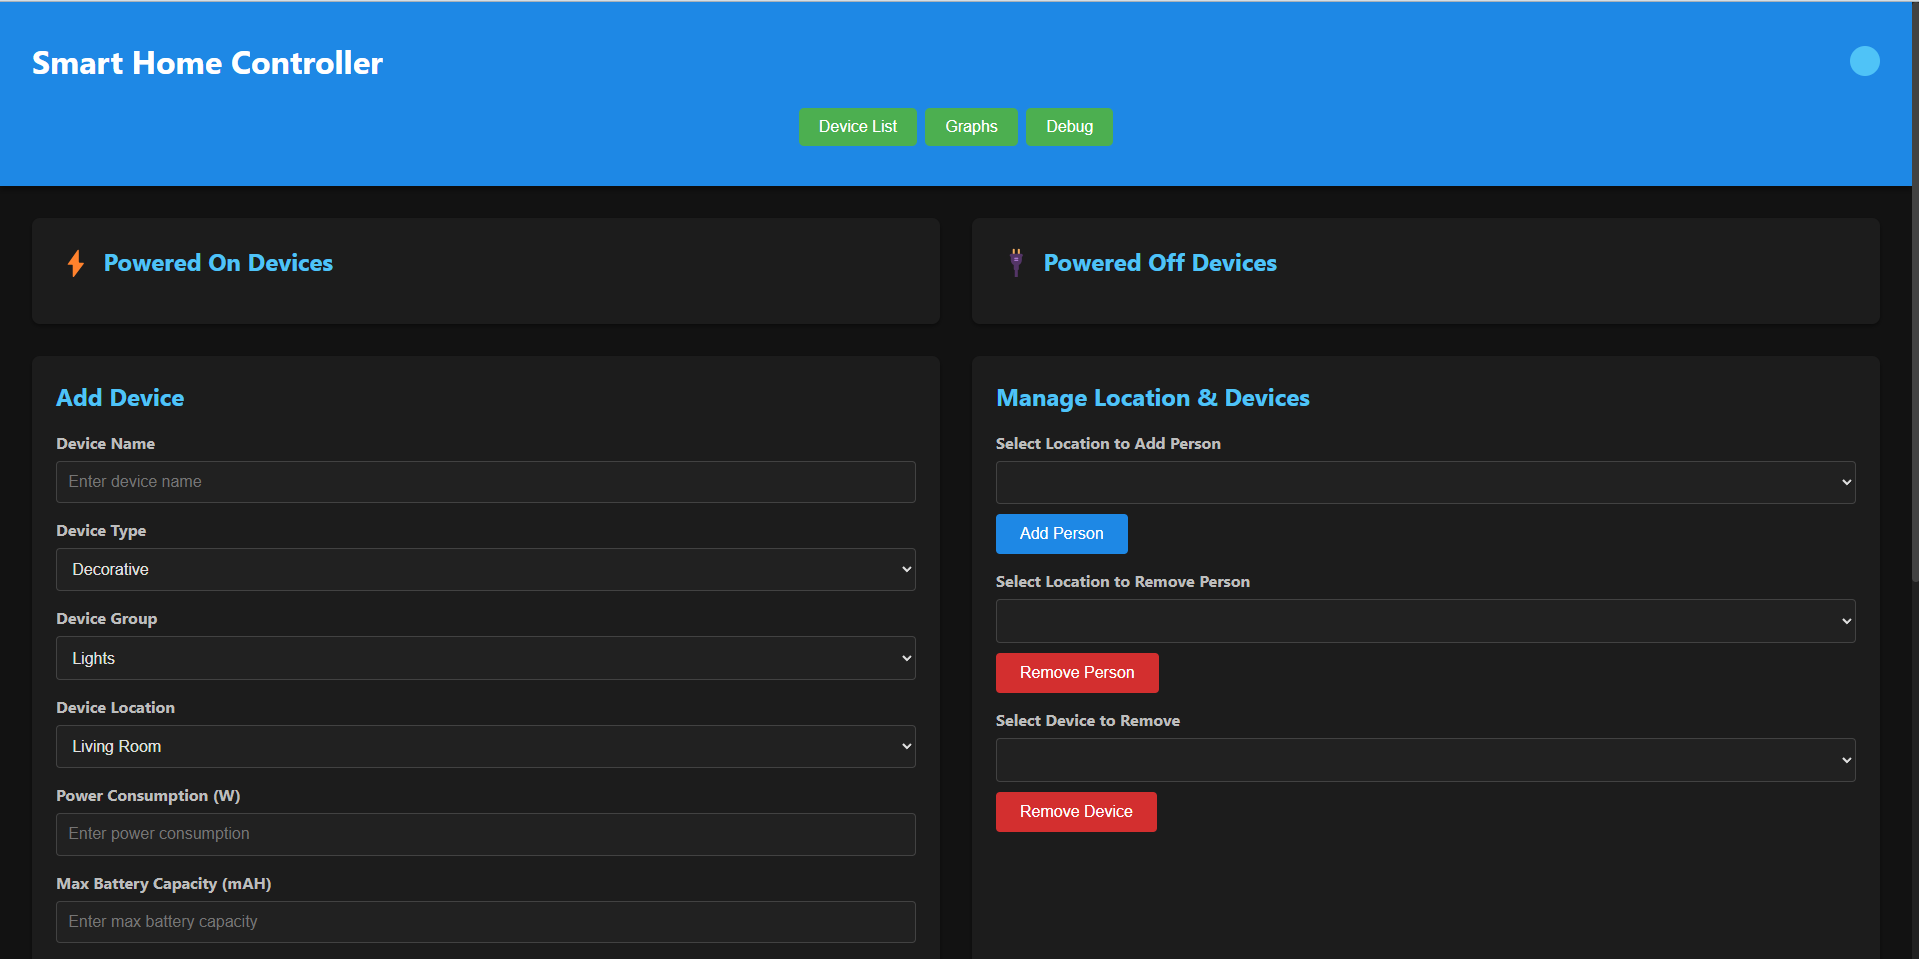

## Bugs & Future Plans

### Project Timeline

*   **Week 1:** Implement rule execution and test code
*   **Week 2:** Connect with frontend using Flask
*   **Week 3:** Identify and fix any bugs


### Known Bugs

*   **Device Removal:** Occasionally, device removal might be off by one element.
*   **Improper Logging** Logger logs much more than needed
*   **Sorting and Reversing:** Optimize the efficiency of sorting and reversing operations (presumably within the `LinkedList` or `Priority Queue`).